# PROJET 7


# IMPLEMENTER UN MODELE DE SCORING


## NOTEBOOK 1 - ANALYSE EXPLORATOIRE

In [1]:
#Essential data science libraries
import pandas as pd
import seaborn as sns
import glob
import pickle
import os
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from bokeh.io import output_notebook,show
from scipy.stats import pearsonr
from sklearn.pipeline import Pipeline
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.model_selection import train_test_split,StratifiedKFold
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestRegressor

from sklearn.feature_selection import RFECV
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings("ignore")

import fonctions_EDA
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

In [3]:
#Graphing…
plt.rcParams.update(
    {
     'xtick.labelsize':12,
     'ytick.labelsize':12,
     'axes.labelsize': 12,
     'legend.fontsize': 12,
     'axes.titlesize':14,
     'axes.titleweight':'bold',
     'axes.titleweight':'bold'
    })

In [4]:
%%time 
application_train = pd.read_csv('data_source/application_train.csv')
application_test = pd.read_csv('data_source/application_test.csv')
bureau = pd.read_csv('data_source/bureau.csv')
bureau_balance = pd.read_csv('data_source/bureau_balance.csv')
credit_card_balance = pd.read_csv('data_source/credit_card_balance.csv')
installments_payments = pd.read_csv('data_source/installments_payments.csv')
POS_CASH_balance = pd.read_csv('data_source/POS_CASH_balance.csv')
previous_application = pd.read_csv('data_source/previous_application.csv')
sample_submission = pd.read_csv('data_source/sample_submission.csv')

Wall time: 28.8 s


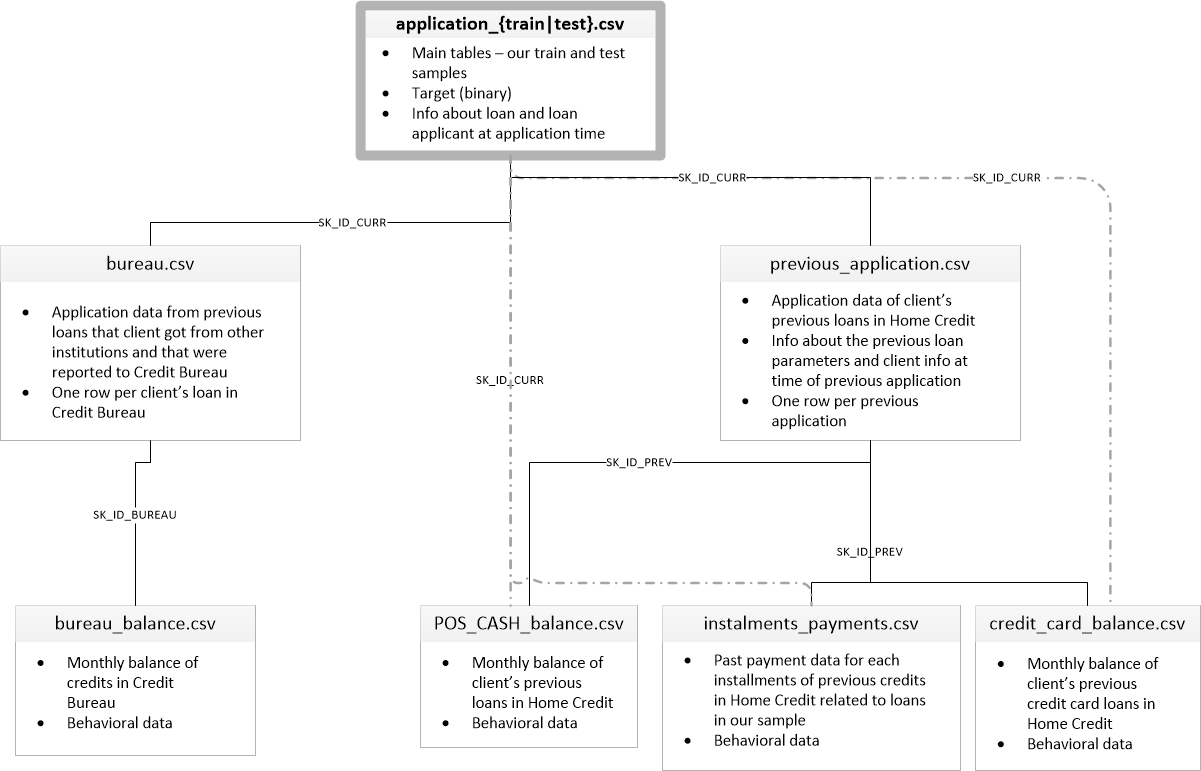

## PARTIE 1 - VISUALISATION DU DATASET

In [5]:
print("DOCUMENTATION :")
pd.set_option("max_colwidth", 400)
description = pd.read_csv('data_source/HomeCredit_columns_description.csv',  encoding="ISO-8859-1")

DOCUMENTATION :


### Table application_train

- Il s'agit du tableau principal, divisé en deux fichiers pour Train (avec TARGET) et Test (sans TARGET).
 
- Une ligne représente un prêt dans notre échantillon de données

In [6]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
application_train.shape

(307511, 122)

In [8]:
fonctions_EDA.nan_check(application_train)

,Total,%
COMMONAREA_MEDI,214865,69.87
COMMONAREA_AVG,214865,69.87
COMMONAREA_MODE,214865,69.87
NONLIVINGAPARTMENTS_MODE,213514,69.43
NONLIVINGAPARTMENTS_AVG,213514,69.43
NONLIVINGAPARTMENTS_MEDI,213514,69.43
FONDKAPREMONT_MODE,210295,68.39
LIVINGAPARTMENTS_MODE,210199,68.35
LIVINGAPARTMENTS_AVG,210199,68.35
LIVINGAPARTMENTS_MEDI,210199,68.35


In [9]:
application_train.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


In [10]:
# Modification des dates pour mettre en entier
application_train['DAYS_BIRTH']=application_train['DAYS_BIRTH']/ -365
application_train['DAYS_EMPLOYED']=application_train['DAYS_EMPLOYED']/ -365
application_train['DAYS_REGISTRATION']=application_train['DAYS_REGISTRATION']/ -365
application_train['DAYS_ID_PUBLISH']=application_train['DAYS_ID_PUBLISH']/ -365
application_train['DAYS_LAST_PHONE_CHANGE']=application_train['DAYS_LAST_PHONE_CHANGE']/ -365

### Table application_test

In [11]:
application_test.head(20)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Marr

In [12]:
application_test.shape

(48744, 121)

In [13]:
fonctions_EDA.nan_check(application_test)

,Total,%
COMMONAREA_AVG,33495,68.72
COMMONAREA_MODE,33495,68.72
COMMONAREA_MEDI,33495,68.72
NONLIVINGAPARTMENTS_AVG,33347,68.41
NONLIVINGAPARTMENTS_MODE,33347,68.41
NONLIVINGAPARTMENTS_MEDI,33347,68.41
FONDKAPREMONT_MODE,32797,67.28
LIVINGAPARTMENTS_AVG,32780,67.25
LIVINGAPARTMENTS_MODE,32780,67.25
LIVINGAPARTMENTS_MEDI,32780,67.25


In [14]:
application_test.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,48744.0,277796.676350,103169.547296,100001.000000,188557.750000,277549.000000,367555.500000,4.562500e+05
CNT_CHILDREN,48744.0,0.397054,0.709047,0.000000,0.000000,0.000000,1.000000,2.000000e+01
AMT_INCOME_TOTAL,48744.0,178431.805855,101522.591536,26941.500000,112500.000000,157500.000000,225000.000000,4.410000e+06
AMT_CREDIT,48744.0,516740.435561,365397.004174,45000.000000,260640.000000,450000.000000,675000.000000,2.245500e+06
AMT_ANNUITY,48720.0,29426.240209,16016.368315,2295.000000,17973.000000,26199.000000,37390.500000,1.805760e+05
AMT_GOODS_PRICE,48744.0,462618.840473,336710.215040,45000.000000,225000.000000,396000.000000,630000.000000,2.245500e+06
REGION_POPULATION_RELATIVE,48744.0,0.021226,0.014428,0.000253,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,48744.0,-16068.084605,4325.900393,-25195.000000,-19637.000000,-15785.000000,-12496.000000,-7.338000e+03
DAYS_EMPLOYED,48744.0,67485.366322,144348.507136,-17463.000000,-2910.000000,-1293.000000,-296.000000,3.652430e+05
DAYS_REGISTRATION,48744.0,-4967.652716,3552.612035,-23722.000000,-7459.250000,-4490.000000,-1901.000000,0.000000e+00


In [15]:
# Modification des dates pour mettre en entier
application_test['DAYS_BIRTH']=application_test['DAYS_BIRTH']/ -365
application_test['DAYS_EMPLOYED']=application_test['DAYS_EMPLOYED']/ -365
application_test['DAYS_REGISTRATION']=application_test['DAYS_REGISTRATION']/ -365
application_test['DAYS_ID_PUBLISH']=application_test['DAYS_ID_PUBLISH']/ -365
application_test['DAYS_LAST_PHONE_CHANGE']=application_test['DAYS_LAST_PHONE_CHANGE']/ -365

## Table bureau

- Tous les crédits antérieurs du client fournis par d'autres institutions financières qui ont été déclarés au bureau de crédit (pour les clients qui ont un prêt dans notre échantillon).

- Pour chaque prêt de notre échantillon, il y a autant de lignes que de crédits que le client avait dans le Bureau de crédit avant la date de demande.

In [16]:
print("DOCUMENTATION :")
pd.set_option("max_colwidth", 400)
description.loc[description['Table']=='bureau.csv']

DOCUMENTATION :


,Unnamed: 0,Table,Row,Description,Special
122,125,bureau.csv,SK_ID_CURR,"ID of loan in our sample - one loan in our sample can have 0,1,2 or more related previous credits in credit bureau",hashed
123,126,bureau.csv,SK_BUREAU_ID,Recoded ID of previous Credit Bureau credit related to our loan (unique coding for each loan application),hashed
124,127,bureau.csv,CREDIT_ACTIVE,Status of the Credit Bureau (CB) reported credits,NaN
125,128,bureau.csv,CREDIT_CURRENCY,Recoded currency of the Credit Bureau credit,recoded
126,129,bureau.csv,DAYS_CREDIT,How many days before current application did client apply for Credit Bureau credit,time only relative to the application
127,130,bureau.csv,CREDIT_DAY_OVERDUE,Number of days past due on CB credit at the time of application for related loan in our sample,NaN
128,131,bureau.csv,DAYS_CREDIT_ENDDATE,Remaining duration of CB credit (in days) at the time of application in Home Credit,time only relative to the application
129,132,bureau.csv,DAYS_ENDDATE_FACT,Days since CB credit ended at the time of application in Home Credit (only for closed credit),time only relative to the application
130,133,bureau.csv,AMT_CREDIT_MAX_OVERDUE,Maximal amount overdue on the Credit Bureau credit so far (at application date of loan in our sample),NaN
131,134,bureau.csv,CNT_CREDIT_PROLONG,How many times was the Credit Bureau credit prolonged,NaN


In [17]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


- CREDIT_DAY_OVERDUE = Nombre de jours de retard sur le crédit CB au moment de la demande de prêt associé dans notre échantillon
- DAYS_CREDIT = Combien de jours avant la demande actuelle le client a-t-il demandé un crédit au bureau de crédit ?
- DAYS_CREDIT_ENDDATE = Durée restante du crédit CB (en jours) au moment de la demande en Crédit Habitation
- DAYS_ENDDATE_FACT = Jours depuis la fin du crédit CB au moment de la demande en Crédit Habitation (uniquement pour le crédit clôturé)
- AMT_CREDIT_MAX_OVERDUE = Montant maximum en souffrance sur le crédit du bureau de crédit jusqu'à présent (à la date de demande de prêt dans notre échantillon)
- CNT_CREDIT_PROLONG = Combien de fois le crédit du bureau de crédit a-t-il été prolongé
- AMT_CREDIT_SUM = Montant actuel du crédit pour le crédit du bureau de crédit
- AMT_CREDIT_SUM_DEBT = Dette actuelle sur le crédit du bureau de crédit
- AMT_CREDIT_SUM_LIMIT = Limite de crédit actuelle de la carte de crédit déclarée dans le bureau de crédit
- AMT_CREDIT_SUM_OVERDUE = Montant actuel en souffrance sur le crédit du bureau de crédit
- CREDIT_TYPE = Type de crédit
- DAYS_CREDIT_UPDATE = Combien de jours avant la demande de prêt les dernières informations sur le crédit du bureau de crédit sont-elles arrivées
- AMT_ANNUITY = Rente du crédit du bureau de crédit

In [18]:
# Modification des dates pour mettre en entier
bureau['DAYS_CREDIT']=bureau['DAYS_CREDIT']/ -365
bureau['CREDIT_DAY_OVERDUE']=bureau['CREDIT_DAY_OVERDUE']/ -365
bureau['DAYS_CREDIT_ENDDATE']=bureau['DAYS_CREDIT_ENDDATE']/ -365
bureau['DAYS_ENDDATE_FACT']=bureau['DAYS_ENDDATE_FACT']/ -365
bureau['DAYS_CREDIT_UPDATE']=bureau['DAYS_CREDIT_UPDATE']/ -365

### 1 - 2  Data bureau - Matrice de corrélation

In [19]:
#Nombre de colonne de chaque type
df=bureau.copy()
df.dtypes.value_counts()

float64    11
int64       3
object      3
dtype: int64

In [20]:
df=df.select_dtypes(['int64', 'float64'])
df=df.drop(['SK_ID_CURR'], axis=1)

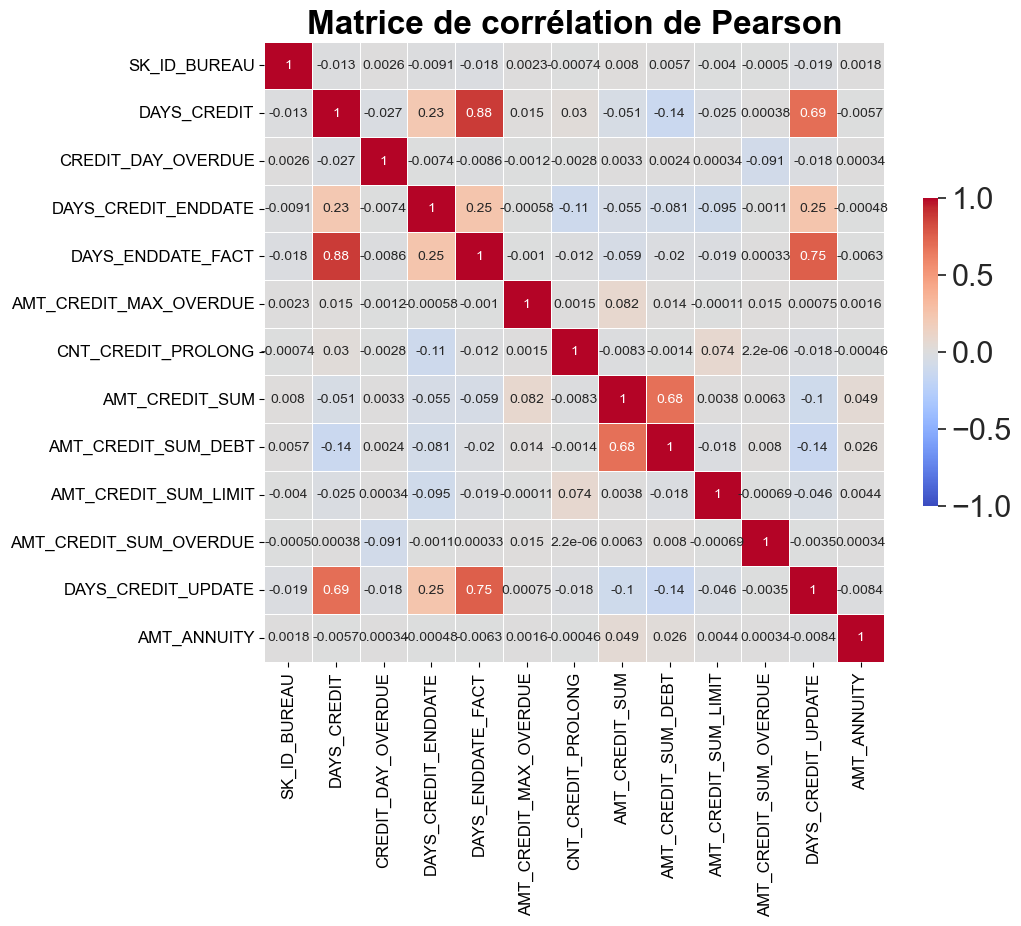

In [21]:

df_corr= df.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.set(font_scale=2)
heatmap = sns.heatmap(df.corr(),
                     # mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 10})

ax.set_title('Matrice de corrélation de Pearson')
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})


In [22]:
# Jours depuis la fin du crédit CB au moment de la demande en Crédit Habitation (uniquement pour le crédit clôturé)
bureau.loc[(bureau['CREDIT_ACTIVE']=='Active'),'DAYS_ENDDATE_FACT']=0

In [23]:
bureau.shape

(1716428, 17)

In [24]:
fonctions_EDA.nan_check(bureau)

,Total,%
AMT_ANNUITY,1226791,71.47
AMT_CREDIT_MAX_OVERDUE,1124488,65.51
AMT_CREDIT_SUM_LIMIT,591780,34.48
AMT_CREDIT_SUM_DEBT,257669,15.01
DAYS_CREDIT_ENDDATE,105553,6.15
DAYS_ENDDATE_FACT,5015,0.29
CREDIT_ACTIVE,0,0.00
CREDIT_CURRENCY,0,0.00
DAYS_CREDIT,0,0.00
CREDIT_DAY_OVERDUE,0,0.00


In [25]:
bureau.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,1716428.0,2.782149e+05,1.029386e+05,1.000010e+05,1.888668e+05,2.780550e+05,3.674260e+05,4.562550e+05
SK_ID_BUREAU,1716428.0,5.924434e+06,5.322657e+05,5.000000e+06,5.463954e+06,5.926304e+06,6.385681e+06,6.843457e+06
DAYS_CREDIT,1716428.0,3.129062e+00,2.178534e+00,-0.000000e+00,1.298630e+00,2.704110e+00,4.564384e+00,8.005479e+00
CREDIT_DAY_OVERDUE,1716428.0,-2.241552e-03,1.001217e-01,-7.649315e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00
DAYS_CREDIT_ENDDATE,1610875.0,-1.398678e+00,1.368279e+01,-8.547671e+01,-1.298630e+00,9.041096e-01,3.117808e+00,1.152329e+02
DAYS_ENDDATE_FACT,1711413.0,1.759353e+00,2.053695e+00,0.000000e+00,0.000000e+00,9.698630e-01,2.983562e+00,1.151315e+02
AMT_CREDIT_MAX_OVERDUE,591940.0,3.825418e+03,2.060316e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.159872e+08
CNT_CREDIT_PROLONG,1716428.0,6.410406e-03,9.622391e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00
AMT_CREDIT_SUM,1716415.0,3.549946e+05,1.149811e+06,0.000000e+00,5.130000e+04,1.255185e+05,3.150000e+05,5.850000e+08
AMT_CREDIT_SUM_DEBT,1458759.0,1.370851e+05,6.774011e+05,-4.705600e+06,0.000000e+00,0.000000e+00,4.015350e+04,1.701000e+08


## Table bureau_balance

- Soldes mensuels des crédits précédents dans le bureau de crédit.
- Ce tableau comporte une ligne pour chaque mois d'historique de chaque crédit précédent signalé au bureau de crédit - c'est-à-dire que le tableau comporte (#prêts dans l'échantillon * # de crédits précédents relatifs * # de mois où nous avons un historique observable pour les crédits précédents) lignes .

In [26]:
print("DOCUMENTATION :")
pd.set_option("max_colwidth", 400)
description.loc[description['Table']=='bureau_balance.csv']

DOCUMENTATION :


,Unnamed: 0,Table,Row,Description,Special
139,142,bureau_balance.csv,SK_BUREAU_ID,Recoded ID of Credit Bureau credit (unique coding for each application) - use this to join to CREDIT_BUREAU table,hashed
140,143,bureau_balance.csv,MONTHS_BALANCE,Month of balance relative to application date (-1 means the freshest balance date),time only relative to the application
141,144,bureau_balance.csv,STATUS,"Status of Credit Bureau loan during the month (active, closed, DPD0-30, [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60, 5 means DPD 120+ or sold or written off ] )",NaN


STATUS =Statut du prêt du bureau de crédit au cours du mois (actif, fermé, DPD0-30, [C signifie fermé, X signifie statut inconnu, 0 signifie pas de DPD, 1 signifie maximum fait au cours du mois entre 1-30, 2 signifie DPD 31-60, 5 signifie DPD 120+ ou vendu ou radié ] )

In [27]:
bureau_balance.head(200)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
5,5715448,-5,C
6,5715448,-6,C
7,5715448,-7,C
8,5715448,-8,C
9,5715448,-9,0


In [28]:
bureau_balance.shape

(27299925, 3)

In [29]:
fonctions_EDA.nan_check(bureau_balance)

,Total,%
SK_ID_BUREAU,0,0.0
MONTHS_BALANCE,0,0.0
STATUS,0,0.0


In [30]:
bureau_balance.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_BUREAU,27299925.0,6.036297e+06,492348.856904,5001709.0,5730933.0,6070821.0,6431951.0,6842888.0
MONTHS_BALANCE,27299925.0,-3.074169e+01,23.864509,-96.0,-46.0,-25.0,-11.0,0.0


## Table credit_card_balance

- Aperçus du solde mensuel des cartes de crédit précédentes que le demandeur possède avec Home Credit.
- Ce tableau comporte une ligne pour chaque mois d'historique de chaque crédit précédent en crédit immobilier (crédit à la consommation et prêts de trésorerie) lié aux prêts de notre échantillon - c'est-à-dire que le tableau contient (#prêts dans l'échantillon * # de cartes de crédit précédentes relatives * # de mois où nous avons un historique observable pour les lignes de cartes de crédit précédentes.

In [31]:
print("DOCUMENTATION :")
pd.set_option("max_colwidth", 400)
description.loc[description['Table']=='credit_card_balance.csv']

DOCUMENTATION :


,Unnamed: 0,Table,Row,Description,Special
150,153,credit_card_balance.csv,SK_ID_PREV,"ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)",hashed
151,154,credit_card_balance.csv,SK_ID_CURR,ID of loan in our sample,hashed
152,155,credit_card_balance.csv,MONTHS_BALANCE,Month of balance relative to application date (-1 means the freshest balance date),time only relative to the application
153,156,credit_card_balance.csv,AMT_BALANCE,Balance during the month of previous credit,NaN
154,157,credit_card_balance.csv,AMT_CREDIT_LIMIT_ACTUAL,Credit card limit during the month of the previous credit,NaN
155,158,credit_card_balance.csv,AMT_DRAWINGS_ATM_CURRENT,Amount drawing at ATM during the month of the previous credit,NaN
156,159,credit_card_balance.csv,AMT_DRAWINGS_CURRENT,Amount drawing during the month of the previous credit,NaN
157,160,credit_card_balance.csv,AMT_DRAWINGS_OTHER_CURRENT,Amount of other drawings during the month of the previous credit,NaN
158,161,credit_card_balance.csv,AMT_DRAWINGS_POS_CURRENT,Amount drawing or buying goods during the month of the previous credit,NaN
159,162,credit_card_balance.csv,AMT_INST_MIN_REGULARITY,Minimal installment for this month of the previous credit,NaN


In [32]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


- AMT_BALANCE = Solde au cours du mois du crédit précédent
- AMT_CREDIT_LIMIT_ACTUAL =Limite de carte de crédit pendant le mois du crédit précédent
- AMT_DRAWINGS_ATM_CURRENT = Montant retiré au distributeur durant le mois du crédit précédent
- AMT_DRAWINGS_CURRENT = Montant prélevé au cours du mois du crédit précédent
- AMT_DRAWINGS_OTHER_CURRENT = Montant des autres tirages au cours du mois du crédit précédent
- AMT_DRAWINGS_POS_CURRENT = Montant du retrait ou de l'achat de biens au cours du mois du crédit précédent
- AMT_INST_MIN_REGULARITY = Versement minimal pour ce mois du crédit précédent
- AMT_PAYMENT_CURRENT = Combien le client a-t-il payé au cours du mois sur le crédit précédent
- AMT_PAYMENT_TOTAL_CURRENT = Combien le client a-t-il payé au total au cours du mois sur le crédit précédent
- AMT_RECEIVABLE_PRINCIPAL = Montant à recevoir en principal sur le crédit précédent
- AMT_RECIVABLE = Montant à recevoir sur le crédit précédent
- AMT_TOTAL_RECEIVABLE = Montant total à recevoir sur le crédit précédent
- CNT_DRAWINGS_ATM_CURRENT = Nombre de tirages au distributeur durant ce mois sur le crédit précédent
- CNT_DRAWINGS_CURRENT = Nombre de tirages durant ce mois sur le crédit précédent
- CNT_DRAWINGS_OTHER_CURRENT = Nombre d'autres tirages durant ce mois sur le crédit précédent
- CNT_DRAWINGS_POS_CURRENT= Nombre de tirages de marchandises durant ce mois sur le crédit précédent
- CNT_INSTALMENT_MATURE_CUM = Nombre d'échéances payées sur le crédit précédent
- NAME_CONTRACT_STATUS = Statut du contrat (actif signé,...) sur le crédit précédent 
- SK_DPD = DPD (Jours de Retard) au cours du mois sur le crédit précédent
- SK_DPD_DEF =DPD (Jours en souffrance) au cours du mois avec tolérance (les dettes avec de faibles montants de prêt sont ignorées) du crédit précédent

In [33]:
credit_card_balance.shape

(3840312, 23)

#### Credit_card_balance - Matrice de corrélation

In [34]:
#Nombre de colonne de chaque type
df=credit_card_balance.copy()
df.dtypes.value_counts()

float64    15
int64       7
object      1
dtype: int64

In [35]:
df=df.select_dtypes(['int64', 'float64'])
df=df.drop(['SK_ID_PREV','SK_ID_CURR'], axis=1)

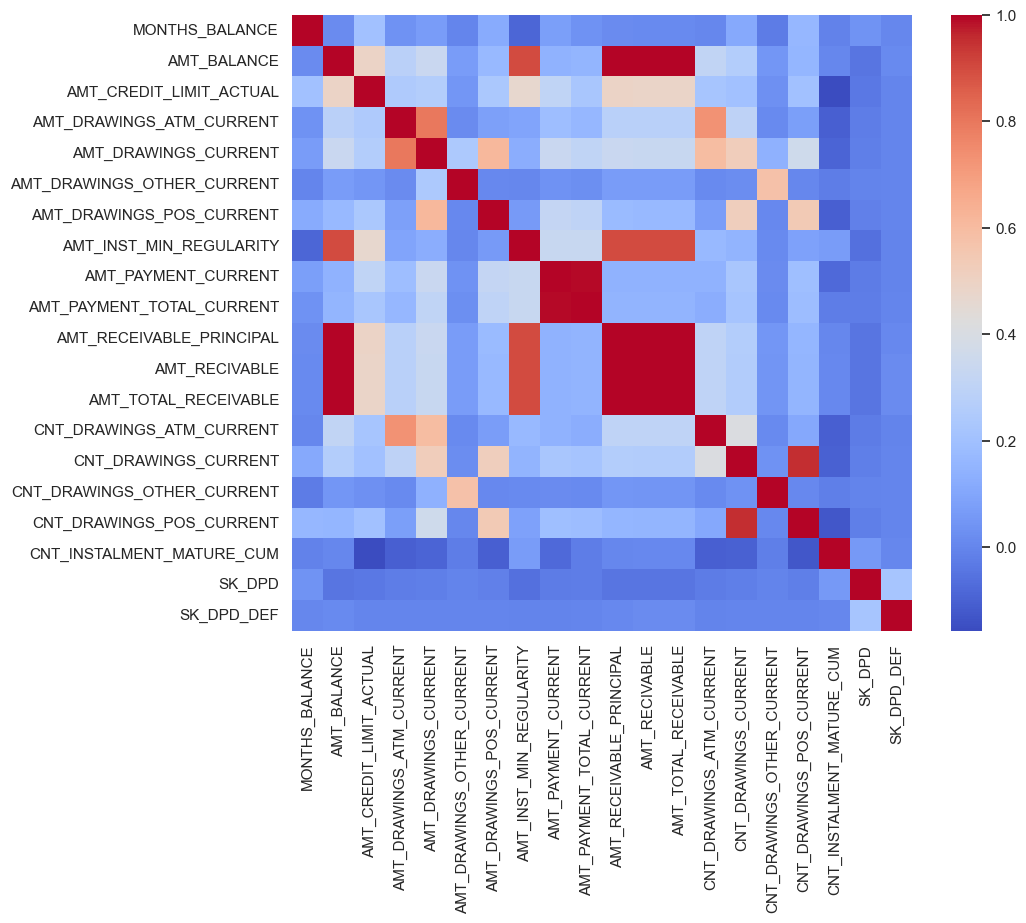

In [36]:
sns.set(rc={'figure.figsize':(10,8)})
df_corr= df.corr()
ax = sns.heatmap(df_corr, xticklabels = df_corr.columns , 
                 yticklabels = df_corr.columns, cmap = 'coolwarm')

In [37]:
def correlation(df,col1,col2):
    df=df[df[col1].notna() & df[col2].notna()]
    list1 = df[col1]
    list2 = df[col2]
    
    corr, _ = pearsonr(list1, list2)
    print('Pearsons correlation',col1 ,'et ', col2,' : %.3f' % corr)


In [38]:
correlation(df,'AMT_TOTAL_RECEIVABLE','AMT_RECIVABLE')
correlation(df,'AMT_TOTAL_RECEIVABLE','AMT_BALANCE')
correlation(df,'AMT_RECEIVABLE_PRINCIPAL','AMT_TOTAL_RECEIVABLE')
correlation(df,'AMT_PAYMENT_CURRENT','AMT_PAYMENT_TOTAL_CURRENT')
correlation(df,'SK_DPD','SK_DPD_DEF')

Pearsons correlation AMT_TOTAL_RECEIVABLE et  AMT_RECIVABLE  : 1.000
Pearsons correlation AMT_TOTAL_RECEIVABLE et  AMT_BALANCE  : 1.000
Pearsons correlation AMT_RECEIVABLE_PRINCIPAL et  AMT_TOTAL_RECEIVABLE  : 1.000
Pearsons correlation AMT_PAYMENT_CURRENT et  AMT_PAYMENT_TOTAL_CURRENT  : 0.995
Pearsons correlation SK_DPD et  SK_DPD_DEF  : 0.219


In [39]:
df=credit_card_balance[credit_card_balance['AMT_DRAWINGS_CURRENT'].notna() & credit_card_balance['AMT_DRAWINGS_ATM_CURRENT'].notna()& credit_card_balance['AMT_DRAWINGS_OTHER_CURRENT'].notna()& credit_card_balance['AMT_DRAWINGS_POS_CURRENT'].notna()]
list1 = df['AMT_DRAWINGS_CURRENT']
list2 = df['AMT_DRAWINGS_ATM_CURRENT']+df['AMT_DRAWINGS_OTHER_CURRENT']+df['AMT_DRAWINGS_POS_CURRENT']
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.998


In [40]:
# Utilisation de la corrélation pour estimer la valeur des 3 AMT par rapport à la valeur de AMT_DRAWINGS_CURRENT avant suppression
df=credit_card_balance.loc[credit_card_balance['AMT_DRAWINGS_OTHER_CURRENT'].isna() | credit_card_balance['AMT_DRAWINGS_POS_CURRENT'].isna() | credit_card_balance['AMT_DRAWINGS_ATM_CURRENT'].isna()]
df['AMT_DRAWINGS_CURRENT'].value_counts()

0.0    749816
Name: AMT_DRAWINGS_CURRENT, dtype: int64

In [41]:
# AMT_DRAWINGS_CURRENT vaut 0 pour toutes les lignes où données manquantes --> 0
credit_card_balance.loc[(credit_card_balance['AMT_DRAWINGS_ATM_CURRENT'].isna()),'AMT_DRAWINGS_ATM_CURRENT']=0
credit_card_balance.loc[(credit_card_balance['AMT_DRAWINGS_OTHER_CURRENT'].isna()),'AMT_DRAWINGS_OTHER_CURRENT']=0
credit_card_balance.loc[(credit_card_balance['AMT_DRAWINGS_POS_CURRENT'].isna()),'AMT_DRAWINGS_POS_CURRENT']=0

In [42]:
df.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
45,2657726,399970,-5,0.0,225000,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
47,1517613,121258,-6,0.0,135000,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
49,2408643,104761,-4,0.0,225000,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
52,1322825,215709,-5,0.0,180000,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
60,1217908,162464,-5,0.0,45000,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0


In [43]:
df=credit_card_balance[credit_card_balance['CNT_DRAWINGS_CURRENT'].notna() & credit_card_balance['CNT_DRAWINGS_ATM_CURRENT'].notna()& credit_card_balance['CNT_DRAWINGS_OTHER_CURRENT'].notna()& credit_card_balance['CNT_DRAWINGS_POS_CURRENT'].notna()]
list1 = df['CNT_DRAWINGS_CURRENT']
list2 = df['CNT_DRAWINGS_ATM_CURRENT']+df['CNT_DRAWINGS_OTHER_CURRENT']+df['CNT_DRAWINGS_POS_CURRENT']
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 1.000


In [44]:
# Utilisation de la corrélation pour estimer la valeur des 3 AMT par rapport à la valeur de AMT_DRAWINGS_CURRENT avant suppression
df=credit_card_balance.loc[credit_card_balance['CNT_DRAWINGS_OTHER_CURRENT'].isna() | credit_card_balance['CNT_DRAWINGS_POS_CURRENT'].isna() | credit_card_balance['CNT_DRAWINGS_ATM_CURRENT'].isna()]
df['AMT_DRAWINGS_CURRENT'].value_counts()


0.0    749816
Name: AMT_DRAWINGS_CURRENT, dtype: int64

In [45]:
# AMT_DRAWINGS_CURRENT vaut 0 pour toutes les lignes où données manquantes --> 0
credit_card_balance.loc[(credit_card_balance['CNT_DRAWINGS_OTHER_CURRENT'].isna()),'CNT_DRAWINGS_OTHER_CURRENT']=0
credit_card_balance.loc[(credit_card_balance['CNT_DRAWINGS_POS_CURRENT'].isna()),'CNT_DRAWINGS_POS_CURRENT']=0
credit_card_balance.loc[(credit_card_balance['CNT_DRAWINGS_ATM_CURRENT'].isna()),'CNT_DRAWINGS_ATM_CURRENT']=0

In [46]:
credit_card_balance=credit_card_balance.drop(['AMT_PAYMENT_CURRENT','AMT_RECIVABLE','AMT_BALANCE','AMT_RECEIVABLE_PRINCIPAL','AMT_DRAWINGS_CURRENT','CNT_DRAWINGS_CURRENT'],axis=1)

In [47]:
fonctions_EDA.nan_check(credit_card_balance)

,Total,%
CNT_INSTALMENT_MATURE_CUM,305236,7.95
AMT_INST_MIN_REGULARITY,305236,7.95
SK_ID_PREV,0,0.00
AMT_TOTAL_RECEIVABLE,0,0.00
SK_DPD,0,0.00
NAME_CONTRACT_STATUS,0,0.00
CNT_DRAWINGS_POS_CURRENT,0,0.00
CNT_DRAWINGS_OTHER_CURRENT,0,0.00
CNT_DRAWINGS_ATM_CURRENT,0,0.00
AMT_PAYMENT_TOTAL_CURRENT,0,0.00


In [48]:
credit_card_balance.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,3840312.0,1.904504e+06,536469.470563,1000018.000,1434385.0,1897122.0,2.369328e+06,2843496.000
SK_ID_CURR,3840312.0,2.783242e+05,102704.475133,100006.000,189517.0,278396.0,3.675800e+05,456250.000
MONTHS_BALANCE,3840312.0,-3.452192e+01,26.667751,-96.000,-55.0,-28.0,-1.100000e+01,-1.000
AMT_CREDIT_LIMIT_ACTUAL,3840312.0,1.538080e+05,165145.699523,0.000,45000.0,112500.0,1.800000e+05,1350000.000
AMT_DRAWINGS_ATM_CURRENT,3840312.0,4.797384e+03,25430.704370,-6827.310,0.0,0.0,0.000000e+00,2115000.000
AMT_DRAWINGS_OTHER_CURRENT,3840312.0,2.319048e+02,7358.721299,0.000,0.0,0.0,0.000000e+00,1529847.000
AMT_DRAWINGS_POS_CURRENT,3840312.0,2.389150e+03,18693.534956,0.000,0.0,0.0,0.000000e+00,2239274.160
AMT_INST_MIN_REGULARITY,3535076.0,3.540204e+03,5600.154122,0.000,0.0,0.0,6.633911e+03,202882.005
AMT_PAYMENT_TOTAL_CURRENT,3840312.0,7.588857e+03,32005.987768,0.000,0.0,0.0,6.750000e+03,4278315.690
AMT_TOTAL_RECEIVABLE,3840312.0,5.809829e+04,105971.801103,-420250.185,0.0,0.0,8.891451e+04,1493338.185


## Table installments_payments

- Historique de remboursement des crédits précédemment décaissés en Crédit Habitation liés aux prêts de notre échantillon.
- Il y a 
a) une ligne pour chaque paiement effectué plus 
b) une ligne pour chaque paiement manqué.
Une ligne équivaut à un versement d'une échéance OU à un versement correspondant à un versement d'un précédent crédit logement lié aux prêts de notre échantillon.

In [49]:
print("DOCUMENTATION :")
pd.set_option("max_colwidth", 400)
description.loc[description['Table']=='installments_payments.csv']

DOCUMENTATION :


,Unnamed: 0,Table,Row,Description,Special
211,214,installments_payments.csv,SK_ID_PREV,"ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)",hashed
212,215,installments_payments.csv,SK_ID_CURR,ID of loan in our sample,hashed
213,216,installments_payments.csv,NUM_INSTALMENT_VERSION,Version of installment calendar (0 is for credit card) of previous credit. Change of installment version from month to month signifies that some parameter of payment calendar has changed,NaN
214,217,installments_payments.csv,NUM_INSTALMENT_NUMBER,On which installment we observe payment,NaN
215,218,installments_payments.csv,DAYS_INSTALMENT,When the installment of previous credit was supposed to be paid (relative to application date of current loan),time only relative to the application
216,219,installments_payments.csv,DAYS_ENTRY_PAYMENT,When was the installments of previous credit paid actually (relative to application date of current loan),time only relative to the application
217,220,installments_payments.csv,AMT_INSTALMENT,What was the prescribed installment amount of previous credit on this installment,NaN
218,221,installments_payments.csv,AMT_PAYMENT,What the client actually paid on previous credit on this installment,NaN


In [50]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


- NUM_INSTALMENT_VERSION = Version du calendrier des versements (0 pour la carte de crédit) du crédit précédent. Le changement de version de versement d'un mois à l'autre signifie que certains paramètres du calendrier de paiement ont changé
- NUM_INSTALMENT_NUMBER =Sur quel versement nous observons le paiement
- DAYS_INSTALMENT = Quand la tranche du crédit précédent devait être payée (par rapport à la date de demande du prêt en cours)
- DAYS_ENTRY_PAYMENT = Quand les échéances du crédit précédent ont-elles été réellement payées (par rapport à la date de demande du prêt en cours)
- AMT_INSTALMENT = Quel était le montant prescrit du crédit précédent sur ce versement
- AMT_PAYMENT = Ce que le client a réellement payé sur son crédit précédent pour ce versement

In [51]:
# Modification des dates pour mettre en entier
installments_payments['DAYS_INSTALMENT']=installments_payments['DAYS_INSTALMENT']/ -365
installments_payments['DAYS_ENTRY_PAYMENT']=installments_payments['DAYS_ENTRY_PAYMENT']/ -365

In [52]:
installments_payments.shape

(13605401, 8)

#### installments_payments - Matrice de corrélation

In [53]:
#Nombre de colonne de chaque type
df=installments_payments.copy()
df.dtypes.value_counts()

float64    5
int64      3
dtype: int64

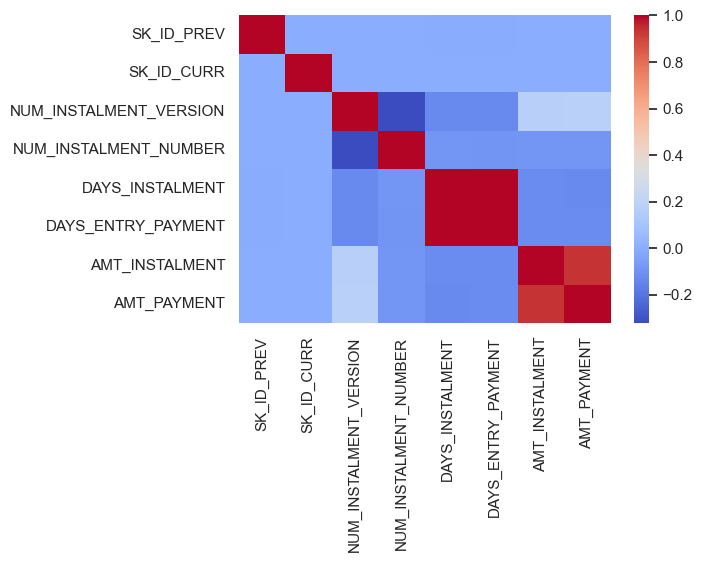

In [54]:
sns.set(rc={'figure.figsize':(6,4)})
df_corr= df.corr()
ax = sns.heatmap(df_corr, xticklabels = df_corr.columns , 
                 yticklabels = df_corr.columns, cmap = 'coolwarm')

In [55]:
correlation(df,'DAYS_INSTALMENT','DAYS_ENTRY_PAYMENT')
correlation(df,'AMT_INSTALMENT','AMT_PAYMENT')

Pearsons correlation DAYS_INSTALMENT et  DAYS_ENTRY_PAYMENT  : 0.999
Pearsons correlation AMT_INSTALMENT et  AMT_PAYMENT  : 0.937


In [56]:
installments_payments=installments_payments.drop(['DAYS_ENTRY_PAYMENT'],axis=1)

In [57]:
fonctions_EDA.nan_check(installments_payments)

,Total,%
AMT_PAYMENT,2905,0.02
SK_ID_PREV,0,0.00
SK_ID_CURR,0,0.00
NUM_INSTALMENT_VERSION,0,0.00
NUM_INSTALMENT_NUMBER,0,0.00
DAYS_INSTALMENT,0,0.00
AMT_INSTALMENT,0,0.00


In [58]:
installments_payments.loc[(installments_payments['AMT_PAYMENT'].isna()),'AMT_PAYMENT']=installments_payments['AMT_INSTALMENT']

In [59]:
installments_payments.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,13605401.0,1.903365e+06,536202.905546,1.000001e+06,1.434191e+06,1.896520e+06,2.369094e+06,2.843499e+06
SK_ID_CURR,13605401.0,2.784449e+05,102718.310411,1.000010e+05,1.896390e+05,2.786850e+05,3.675300e+05,4.562550e+05
NUM_INSTALMENT_VERSION,13605401.0,8.566373e-01,1.035216,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.780000e+02
NUM_INSTALMENT_NUMBER,13605401.0,1.887090e+01,26.664067,1.000000e+00,4.000000e+00,8.000000e+00,1.900000e+01,2.770000e+02
DAYS_INSTALMENT,13605401.0,2.855534e+00,2.194373,2.739726e-03,9.890411e-01,2.241096e+00,4.531507e+00,8.005479e+00
AMT_INSTALMENT,13605401.0,1.705091e+04,50570.254429,0.000000e+00,4.226085e+03,8.884080e+03,1.671021e+04,3.771488e+06
AMT_PAYMENT,13605401.0,1.723802e+04,54736.399751,0.000000e+00,3.396240e+03,8.124480e+03,1.610842e+04,3.771488e+06


### Table POS_CASH_balance

- Aperçus du solde mensuel des précédents points de vente (points de vente) et des prêts de trésorerie que le demandeur avait contractés avec Home Credit.
- Ce tableau comporte une ligne pour chaque mois d'historique de chaque crédit précédent en crédit immobilier (crédit à la consommation et prêts de trésorerie) lié aux prêts de notre échantillon 
- c'est-à-dire que le tableau contient (#prêts dans l'échantillon * # de crédits précédents relatifs * # de mois dans lequel nous avons un historique observable pour les crédits précédents).

In [60]:
print("DOCUMENTATION :")
pd.set_option("max_colwidth", 400)
description.loc[description['Table']=='POS_CASH_balance.csv']

DOCUMENTATION :


,Unnamed: 0,Table,Row,Description,Special
142,145,POS_CASH_balance.csv,SK_ID_PREV,"ID of previous credit in Home Credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)",NaN
143,146,POS_CASH_balance.csv,SK_ID_CURR,ID of loan in our sample,NaN
144,147,POS_CASH_balance.csv,MONTHS_BALANCE,"Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly )",time only relative to the application
145,148,POS_CASH_balance.csv,CNT_INSTALMENT,Term of previous credit (can change over time),NaN
146,149,POS_CASH_balance.csv,CNT_INSTALMENT_FUTURE,Installments left to pay on the previous credit,NaN
147,150,POS_CASH_balance.csv,NAME_CONTRACT_STATUS,Contract status during the month,NaN
148,151,POS_CASH_balance.csv,SK_DPD,DPD (days past due) during the month of previous credit,NaN
149,152,POS_CASH_balance.csv,SK_DPD_DEF,DPD during the month with tolerance (debts with low loan amounts are ignored) of the previous credit,NaN


In [61]:
POS_CASH_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


- CNT_INSTALMENT = Durée du crédit précédent (peut changer dans le temps)
- CNT_INSTALMENT_FUTURE = Acomptes restant à payer sur le crédit précédent
- NAME_CONTRACT_STATUS = Statut du contrat au cours du mois
- SK_DPD = DPD (Jours de Retard) au cours du mois sur le crédit précédent
- SK_DPD_DEF =DPD (Jours en souffrance) au cours du mois avec tolérance (les dettes avec de faibles montants de prêt sont ignorées) du crédit précédent

#### POS_CASH_balance - Matrice de corrélation

In [62]:
#Nombre de colonne de chaque type
df=POS_CASH_balance.copy()
df.dtypes.value_counts()

int64      5
float64    2
object     1
dtype: int64

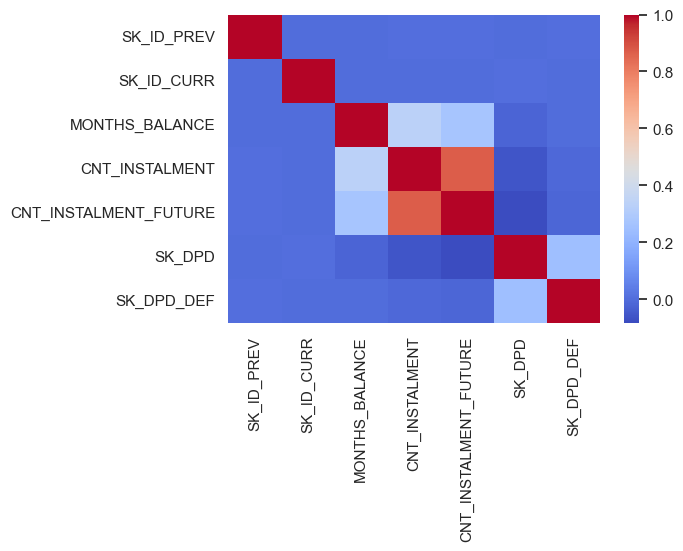

In [63]:
sns.set(rc={'figure.figsize':(6,4)})
df_corr= df.corr()
ax = sns.heatmap(df_corr, xticklabels = df_corr.columns , 
                 yticklabels = df_corr.columns, cmap = 'coolwarm')

In [64]:
POS_CASH_balance.shape

(10001358, 8)

In [65]:
fonctions_EDA.nan_check(POS_CASH_balance)

,Total,%
CNT_INSTALMENT,26071,0.26
CNT_INSTALMENT_FUTURE,26087,0.26
SK_ID_PREV,0,0.00
SK_ID_CURR,0,0.00
MONTHS_BALANCE,0,0.00
NAME_CONTRACT_STATUS,0,0.00
SK_DPD,0,0.00
SK_DPD_DEF,0,0.00


In [66]:
POS_CASH_balance.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,10001358.0,1.903217e+06,535846.530722,1000001.0,1434405.0,1896565.0,2368963.0,2843499.0
SK_ID_CURR,10001358.0,2.784039e+05,102763.745090,100001.0,189550.0,278654.0,367429.0,456255.0
MONTHS_BALANCE,10001358.0,-3.501259e+01,26.066570,-96.0,-54.0,-28.0,-13.0,-1.0
CNT_INSTALMENT,9975287.0,1.708965e+01,11.995056,1.0,10.0,12.0,24.0,92.0
CNT_INSTALMENT_FUTURE,9975271.0,1.048384e+01,11.109058,0.0,3.0,7.0,14.0,85.0
SK_DPD,10001358.0,1.160693e+01,132.714043,0.0,0.0,0.0,0.0,4231.0
SK_DPD_DEF,10001358.0,6.544684e-01,32.762491,0.0,0.0,0.0,0.0,3595.0


### Table previous_application

- Toutes les demandes précédentes de prêts immobiliers des clients qui ont des prêts dans notre échantillon.
- Il y a une ligne pour chaque demande précédente liée aux prêts dans notre échantillon de données.

In [67]:
print("DOCUMENTATION :")
pd.set_option("max_colwidth", 400)
description.loc[description['Table']=='previous_application.csv']

DOCUMENTATION :


,Unnamed: 0,Table,Row,Description,Special
173,176,previous_application.csv,SK_ID_PREV,"ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit)",hashed
174,177,previous_application.csv,SK_ID_CURR,ID of loan in our sample,hashed
175,178,previous_application.csv,NAME_CONTRACT_TYPE,"Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application",NaN
176,179,previous_application.csv,AMT_ANNUITY,Annuity of previous application,NaN
177,180,previous_application.csv,AMT_APPLICATION,For how much credit did client ask on the previous application,NaN
178,181,previous_application.csv,AMT_CREDIT,"Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT",NaN
179,182,previous_application.csv,AMT_DOWN_PAYMENT,Down payment on the previous application,NaN
180,183,previous_application.csv,AMT_GOODS_PRICE,Goods price of good that client asked for (if applicable) on the previous application,NaN
181,184,previous_application.csv,WEEKDAY_APPR_PROCESS_START,On which day of the week did the client apply for previous application,NaN
182,185,previous_application.csv,HOUR_APPR_PROCESS_START,Approximately at what day hour did the client apply for the previous application,rounded


In [68]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


- NAME_CONTRACT_TYPE : Type de produit du contrat (Prêt de trésorerie, Prêt à la consommation [POS],...) de la demande précédente
- AMT_ANNUITY : Rente de la demande précédente
- AMT_APPLICATION : Pour quel montant de crédit le client a-t-il demandé lors de la demande précédente
- AMT_CREDIT : Montant final du crédit sur la demande précédente. Cela diffère d'AMT_APPLICATION dans le sens où AMT_APPLICATION est le montant pour lequel le client a initialement demandé, mais au cours de notre processus d'approbation, il aurait pu recevoir un montant différent - AMT_CREDIT
- AMT_DOWN_PAYMENT : Acompte sur la demande précédente
- AMT_GOODS_PRICE : Prix du bien demandé par le client (le cas échéant) lors de la demande précédente
- WEEKDAY_APPR_PROCESS_START : Quel jour de la semaine le client a-t-il fait une demande précédente
- HOUR_APPR_PROCESS_START:À quelle heure approximative du jour le client a-t-il postulé pour la demande précédente
- FLAG_LAST_APPL_PER_CONTRACT :Indiquer s'il s'agit de la dernière candidature pour le contrat précédent. Parfois, par erreur du client ou de notre commis, il peut y avoir plus de candidatures pour un seul contrat.
- NFLAG_LAST_APPL_IN_DAY :Indique si l'application était la dernière application par jour du client. Parfois, les clients postulent pour plus de candidatures par jour. Rarement, il peut également y avoir une erreur dans notre système si une application se trouve deux fois dans la base de données.
- NFLAG_MICRO_CASH : Prêt microfinance
- RATE_DOWN_PAYMENT : Taux d’acompte normalisé sur crédit précédent
- RATE_INTEREST_PRIMARY :Taux d'intérêt normalisé sur crédit précédent
- RATE_INTEREST_PRIVILEGED :Taux d'intérêt normalisé sur crédit précédent
- NAME_CASH_LOAN_PURPOSE : Objet du prêt de trésorerie
- NAME_CONTRACT_STATUS :Contract status (approved, cancelled, ...) of previous application 	
- DAYS_DECISION : Par rapport à la demande actuelle, quand la décision concernant la demande précédente a-t-elle été prise
- NAME_PAYMENT_TYPE : Mode de paiement que le client a choisi pour payer la demande précédente
- CODE_REJECT_REASON : Pourquoi la demande précédente a-t-elle été rejetée
- NAME_TYPE_SUITE : Qui a accompagné le client lors de la demande précédente
- NAME_CLIENT_TYPE :Le client était-il un ancien ou un nouveau client lors de la candidature à la candidature précédente
- NAME_GOODS_CATEGORY : Quel type de marchandises le client a-t-il demandé lors de la demande précédente
- NAME_PORTFOLIO : La demande précédente était-elle pour CASH, POS, CAR,
- NAME_PRODUCT_TYPE :L'application précédente était-elle x-sell ou walk-in
- CHANNEL_TYPE : Par quel canal nous avons acquis le client sur la candidature précédente
- SELLERPLACE_AREA :Zone de vente du lieu du vendeur de la demande précédente
- NAME_SELLER_INDUSTRY :L'industrie du vendeur
- CNT_PAYMENT :Durée du crédit précédent à l’application de la demande précédente
- NAME_YIELD_GROUP :Taux d'intérêt regroupé en petit moyen et haut de la demande précédente
- PRODUCT_COMBINATION : Detailed product combination of the previous application 	
- DAYS_FIRST_DRAWING : Par rapport à la date de la demande actuelle, à quelle date a eu lieu le premier décaissement de la demande précédente
- DAYS_FIRST_DUE : Par rapport à la date de la demande actuelle, à quelle date la première échéance était-elle censée provenir de la demande précédente ?
- DAYS_LAST_DUE_1ST_VERSION : Par rapport à la date de la demande actuelle, à quelle date la première demande était due pour la demande précédente
- DAYS_LAST_DUE : Par rapport à la date de la demande actuelle, quelle était la dernière date d'échéance de la demande précédente
- DAYS_TERMINATION :Par rapport à la date de candidature de la candidature actuelle, quelle est la fin prévue de la candidature précédente

In [69]:
previous_application['DAYS_FIRST_DRAWING']=previous_application['DAYS_FIRST_DRAWING']/ -365
previous_application['DAYS_FIRST_DUE']=previous_application['DAYS_FIRST_DUE']/ -365
previous_application['DAYS_LAST_DUE_1ST_VERSION']=previous_application['DAYS_LAST_DUE_1ST_VERSION']/ -365
previous_application['DAYS_LAST_DUE']=previous_application['DAYS_LAST_DUE']/ -365
previous_application['DAYS_TERMINATION']=previous_application['DAYS_TERMINATION']/ -365
previous_application['DAYS_DECISION']=previous_application['DAYS_DECISION']/ -365

#### previous_application - Matrice de corrélation

In [70]:
#Nombre de colonne de chaque type
df=previous_application.copy()
df.dtypes.value_counts()

object     16
float64    16
int64       5
dtype: int64

In [71]:
df=df.select_dtypes(['int64', 'float64'])
df=df.drop(['SK_ID_PREV','SK_ID_CURR'], axis=1)

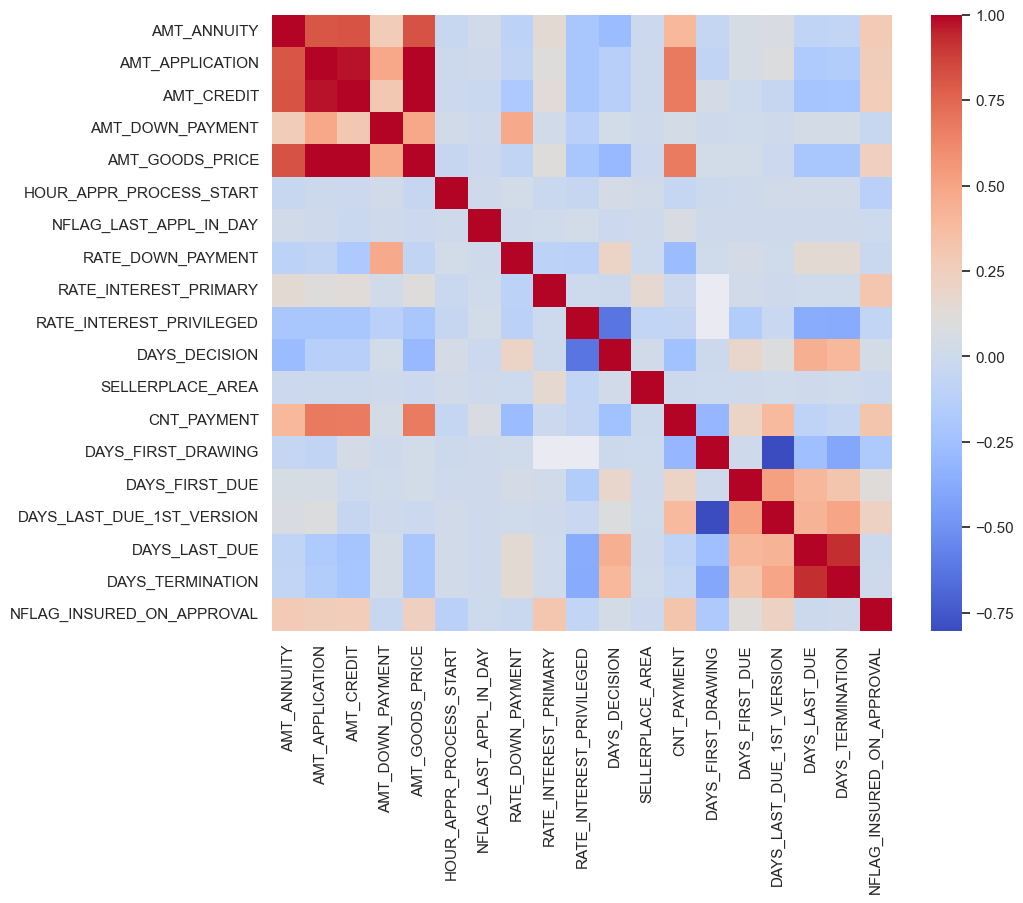

In [72]:
sns.set(rc={'figure.figsize':(10,8)})
df_corr= df.corr()
ax = sns.heatmap(df_corr, xticklabels = df_corr.columns , 
                 yticklabels = df_corr.columns, cmap = 'coolwarm')

In [73]:
correlation(df,'AMT_GOODS_PRICE','AMT_APPLICATION')
correlation(df,'AMT_GOODS_PRICE','AMT_CREDIT')
correlation(df,'AMT_APPLICATION','AMT_CREDIT')
correlation(df,'DAYS_LAST_DUE','DAYS_TERMINATION')

Pearsons correlation AMT_GOODS_PRICE et  AMT_APPLICATION  : 1.000
Pearsons correlation AMT_GOODS_PRICE et  AMT_CREDIT  : 0.993
Pearsons correlation AMT_APPLICATION et  AMT_CREDIT  : 0.976
Pearsons correlation DAYS_LAST_DUE et  DAYS_TERMINATION  : 0.928


In [74]:
previous_application.loc[(previous_application['AMT_CREDIT'].isna()),'AMT_CREDIT']=previous_application['AMT_APPLICATION']

In [75]:
previous_application.shape

(1670214, 37)

In [76]:
fonctions_EDA.nan_check(previous_application)

,Total,%
RATE_INTEREST_PRIVILEGED,1664263,99.64
RATE_INTEREST_PRIMARY,1664263,99.64
RATE_DOWN_PAYMENT,895844,53.64
AMT_DOWN_PAYMENT,895844,53.64
NAME_TYPE_SUITE,820405,49.12
NFLAG_INSURED_ON_APPROVAL,673065,40.30
DAYS_FIRST_DRAWING,673065,40.30
DAYS_FIRST_DUE,673065,40.30
DAYS_LAST_DUE_1ST_VERSION,673065,40.30
DAYS_LAST_DUE,673065,40.30


In [77]:
previous_application=previous_application.drop(['AMT_GOODS_PRICE','AMT_APPLICATION','RATE_INTEREST_PRIVILEGED','RATE_INTEREST_PRIMARY'],axis=1)

In [78]:
previous_application.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,1670214.0,1.923089e+06,532597.958696,1.000001e+06,1.461857e+06,1.923110e+06,2.384280e+06,2.845382e+06
SK_ID_CURR,1670214.0,2.783572e+05,102814.823849,1.000010e+05,1.893290e+05,2.787145e+05,3.675140e+05,4.562550e+05
AMT_ANNUITY,1297979.0,1.595512e+04,14782.137335,0.000000e+00,6.321780e+03,1.125000e+04,2.065842e+04,4.180581e+05
AMT_CREDIT,1670214.0,1.961139e+05,318574.557319,0.000000e+00,2.416050e+04,8.054100e+04,2.164185e+05,6.905160e+06
AMT_DOWN_PAYMENT,774370.0,6.697402e+03,20921.495410,-9.000000e-01,0.000000e+00,1.638000e+03,7.740000e+03,3.060045e+06
HOUR_APPR_PROCESS_START,1670214.0,1.248418e+01,3.334028,0.000000e+00,1.000000e+01,1.200000e+01,1.500000e+01,2.300000e+01
NFLAG_LAST_APPL_IN_DAY,1670214.0,9.964675e-01,0.059330,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
RATE_DOWN_PAYMENT,774370.0,7.963682e-02,0.107823,-1.497876e-05,0.000000e+00,5.160508e-02,1.089091e-01,1.000000e+00
DAYS_DECISION,1670214.0,2.412821e+00,2.134520,2.739726e-03,7.671233e-01,1.591781e+00,3.561644e+00,8.005479e+00
SELLERPLACE_AREA,1670214.0,3.139511e+02,7127.443459,-1.000000e+00,-1.000000e+00,3.000000e+00,8.200000e+01,4.000000e+06


### Table sample_submission

Permission par numéro de crédit

In [79]:
sample_submission.head()

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5


In [80]:
sample_submission.shape

(48744, 2)

In [81]:
fonctions_EDA.nan_check(sample_submission)

,Total,%
SK_ID_CURR,0,0.0
TARGET,0,0.0


## PARTIE 2 - ANALYSE EXPLORATOIRE

In [82]:
print('Training Features shape: ', application_train.shape)
print('Testing Features shape: ', application_test.shape)

Training Features shape:  (307511, 122)
Testing Features shape:  (48744, 121)


In [83]:
#Validation seul feature "TARGET" différente entre train et test
print("Validation des features entre les deux data application_train et application_test.")
display(application_train.columns.difference(application_test.columns))

Validation des features entre les deux data application_train et application_test.


Index(['TARGET'], dtype='object')

#### Distribution de la TARGET

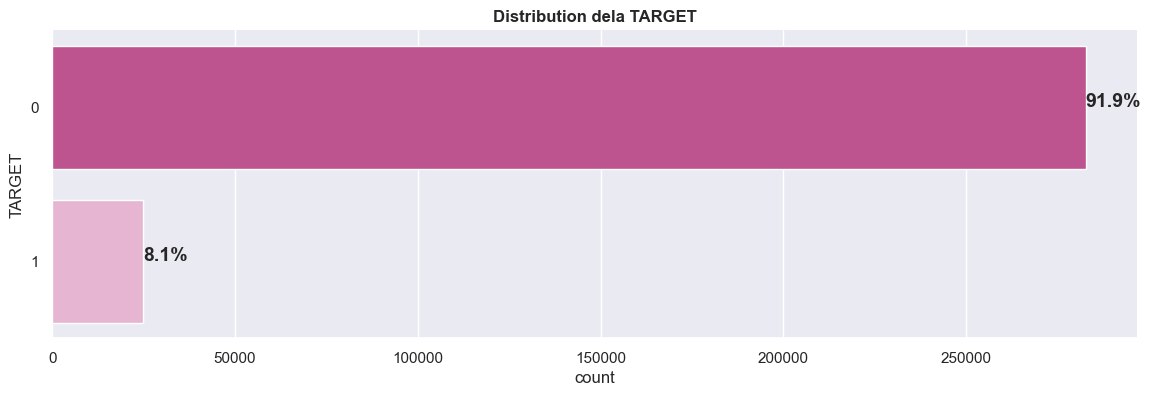

In [84]:
with sns.color_palette("PiYG"):
    ax, fig = plt.subplots(figsize=(14,4)) 

    ax = sns.countplot(y='TARGET', data=application_train)
    ax.set_title("Distribution dela TARGET")

    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/len(application_train.TARGET))
            x = p.get_x() + p.get_width()
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y), fontsize=14, fontweight='bold')
    ax.spines[['right', 'top']].set_visible(False)
    show()

Il y a beaucoup plus de prêts remboursés à temps que de prêts non remboursés

Il est important de se focaliser sur les principales features pouvant être explicatives. Ici l'idée n'est pas de tout analyser en univarié ou multivarié, mais simplement d'avoir une image des points métiers qui aident à orienter nos décisions dans la "prise de risque" à l'attribution d'un crédit.

### Type de contrat - Distribution de la feature et fréquence de défaut de crédit

In [85]:
def plot_stat(data, feature, title) : 
    with sns.color_palette("PiYG"):    
        df=data[data[feature]!="XNA"]
        ax, fig = plt.subplots(figsize=(14,6)) 
        ax = sns.countplot(y=feature, data=df, order=df[feature].value_counts(ascending=False).index)
        ax.set_title(title)
        ax.set_xlabel("")
        ax.set_ylabel("")
        for p in ax.patches:
                    percentage = '{:.1f}%'.format(100 * p.get_width()/len(df[feature]))
                    x = p.get_x() + p.get_width()
                    y = p.get_y() + p.get_height()/2
                    ax.annotate(percentage, (x, y), fontsize=14, fontweight='bold')
        ax.spines[['right', 'top']].set_visible(False)
        show(fig)
        
def plot_percent_target1(data, feature) : 
    df=data[data[feature]!="XNA"]
    cat_perc = df[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    with sns.color_palette("PiYG"):  
        ax, fig = plt.subplots(figsize=(14,6)) 
        ax = sns.barplot(y=feature, x='TARGET', data=cat_perc)
        ax.set_title("Répartition défaut de crédit - Target = 1")
        ax.set_xlabel("")
        ax.set_ylabel(" ")

        for p in ax.patches:
                    percentage = '{:.1f}%'.format(100 * p.get_width())
                    x = p.get_x() + p.get_width()
                    y = p.get_y() + p.get_height()/2
                    ax.annotate(percentage, (x, y), fontsize=14, fontweight='bold')
        ax.spines[['right', 'top']].set_visible(False)
        show()
        
#Plot distribution of one feature
def plot_distribution(data,feature, title):
    plt.figure(figsize=(20,6))

    t0 = data.loc[data['TARGET'] == 0]
    t1 = data.loc[data['TARGET'] == 1]

    
    sns.kdeplot(t0[feature].dropna(), color='blue', label="TARGET = 0")
    sns.kdeplot(t1[feature].dropna(), color='red', label="TARGET = 1")
    plt.title(title)
    plt.ylabel('')
    plt.legend()
    show() 

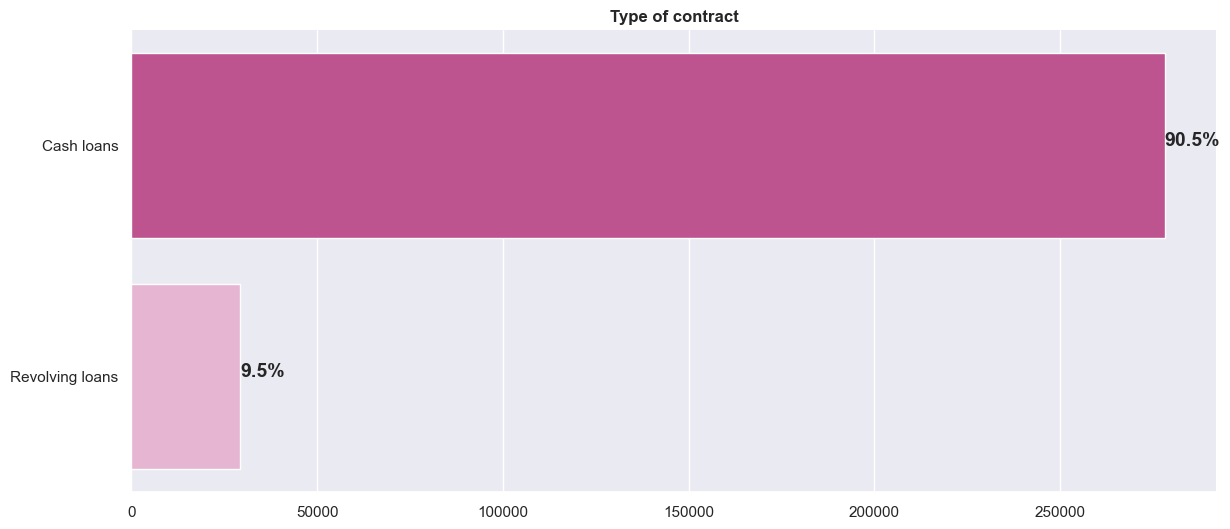

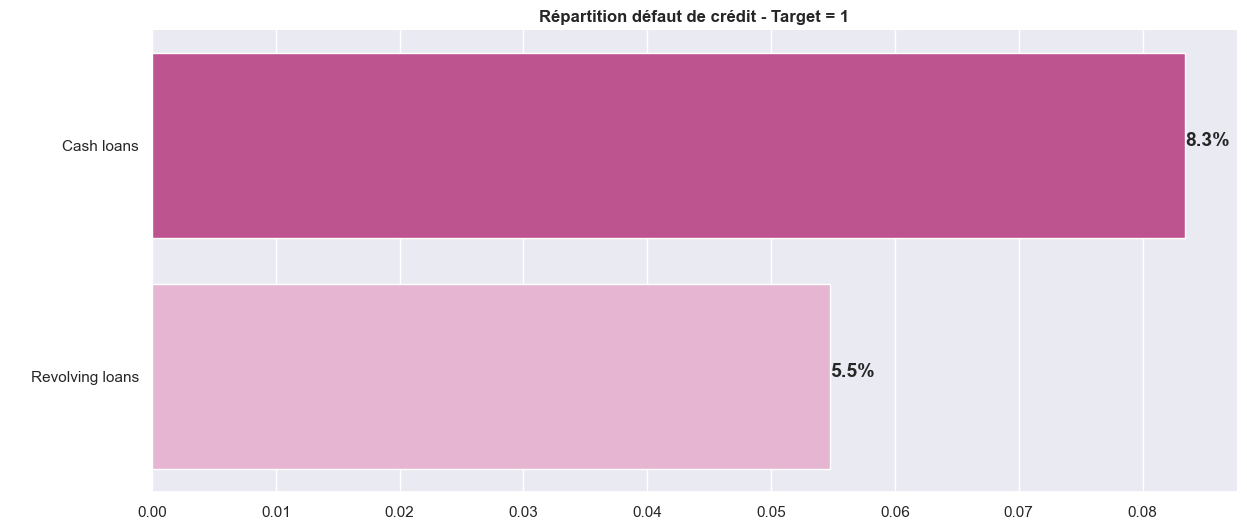

In [86]:
plot_stat(application_train, 'NAME_CONTRACT_TYPE',"Type of contract")
print("")
plot_percent_target1(application_train, 'NAME_CONTRACT_TYPE')

Les prêts renouvelables ne représentent qu'une petite fraction (10%) du nombre total de prêts; dans le même temps, un plus grand nombre de crédits renouvelables, par rapport à leur fréquence, ne sont pas remboursés.

### Genre du client - Distribution de la feature et fréquence de défaut de crédit

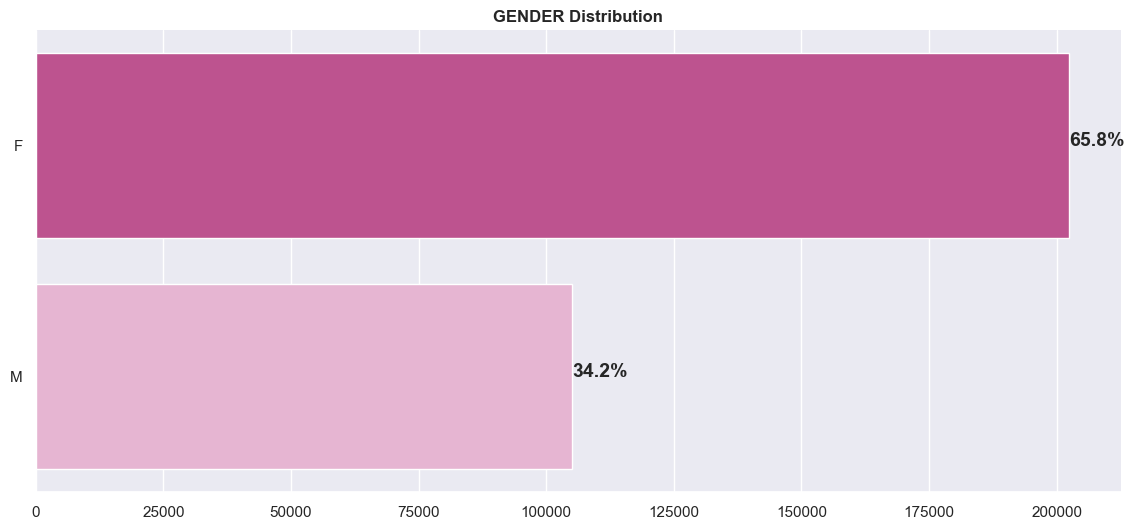

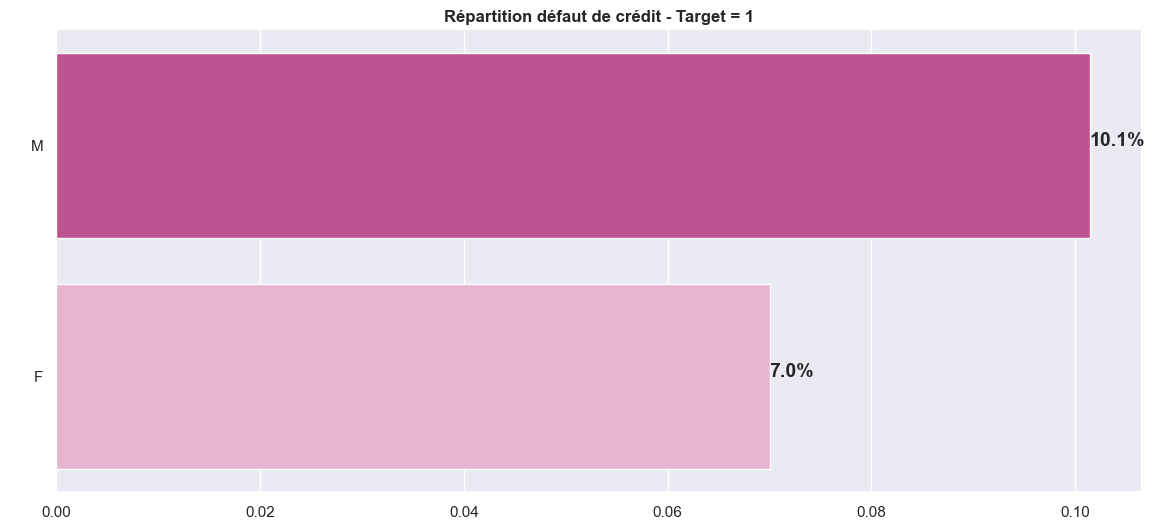

In [87]:
plot_stat(application_train, 'CODE_GENDER',"GENDER Distribution")
print("")
plot_percent_target1(application_train, 'CODE_GENDER')

Le nombre de clients féminins est presque le double du nombre de clients masculins. En ce qui concerne le pourcentage de crédits en souffrance, les hommes ont plus de chances de ne pas rembourser leurs prêts (10%), comparativement aux femmes (7%).

### Flag own car - Distribution de la feature et fréquence de défaut de crédit

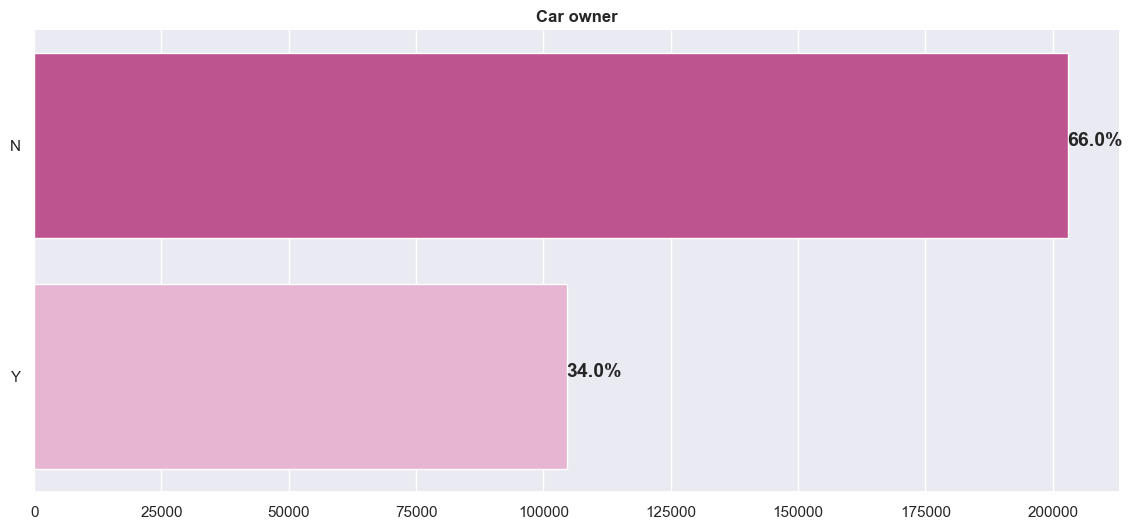

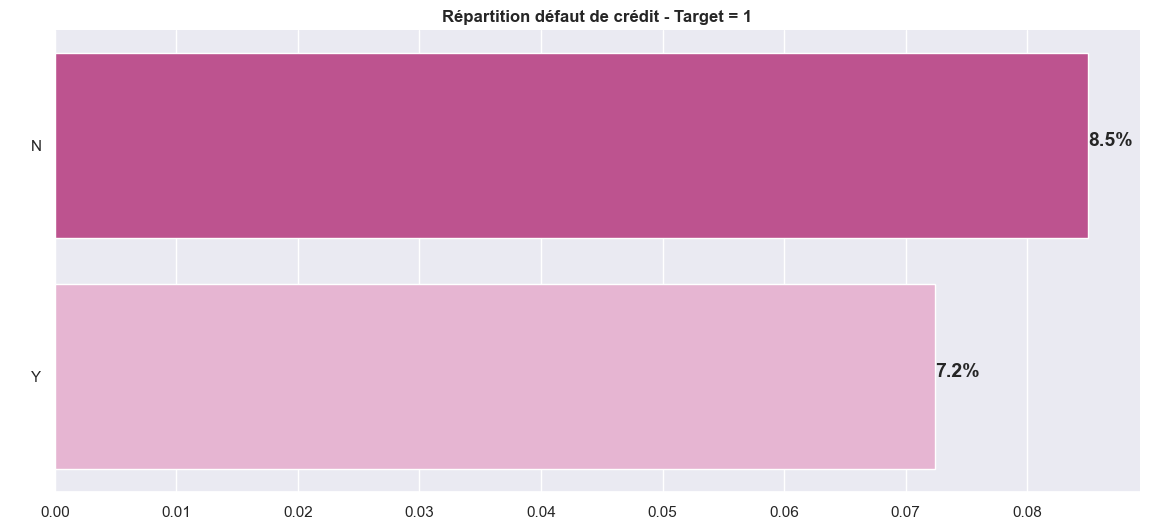

In [88]:
plot_stat(application_train, 'FLAG_OWN_CAR',"Car owner")
print("")
plot_percent_target1(application_train, 'FLAG_OWN_CAR')

Les deux catégories (propriétaire ou non) ont des taux de non-remboursement d'environ 8%.

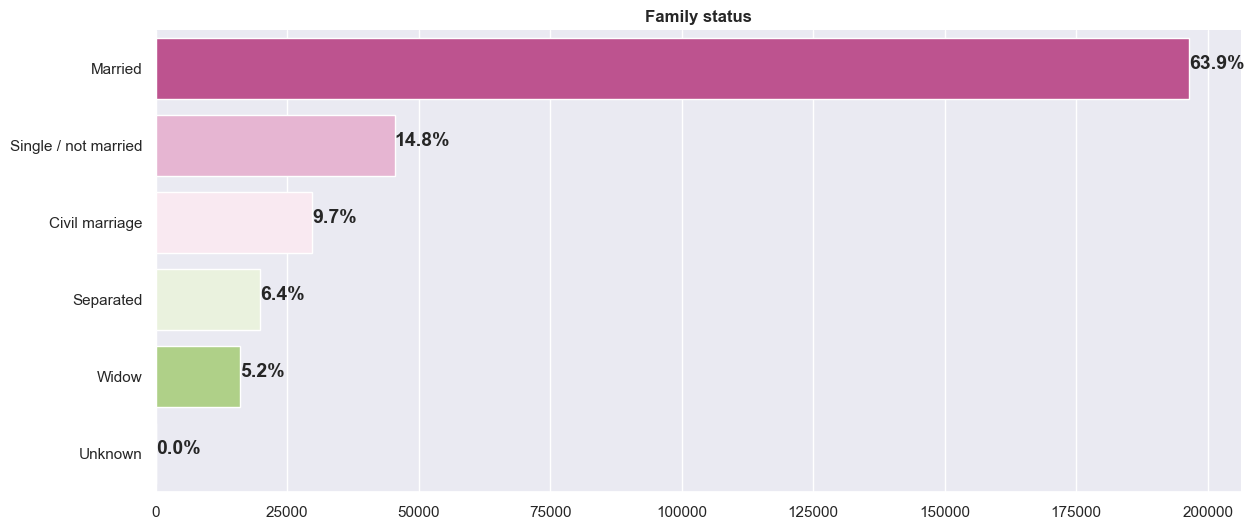

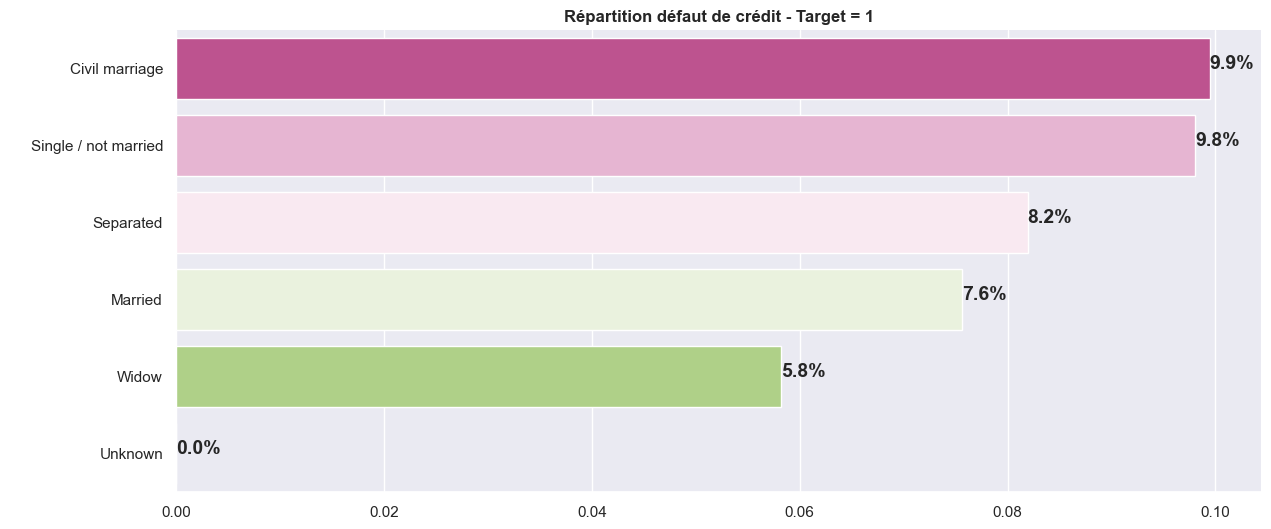

In [89]:
#NAME_FAMILY_STATUS
plot_stat(application_train, 'NAME_FAMILY_STATUS',"Family status")
print("")
plot_percent_target1(application_train, 'NAME_FAMILY_STATUS')

La plupart des clients sont mariés, suivis des célibataires / non mariés et des mariages civils.

En termes de pourcentage de non-remboursement du prêt, le mariage civil a le pourcentage le plus élevé de non-remboursement (10%), la veuve étant le plus bas (à l'exception de l'inconnu).

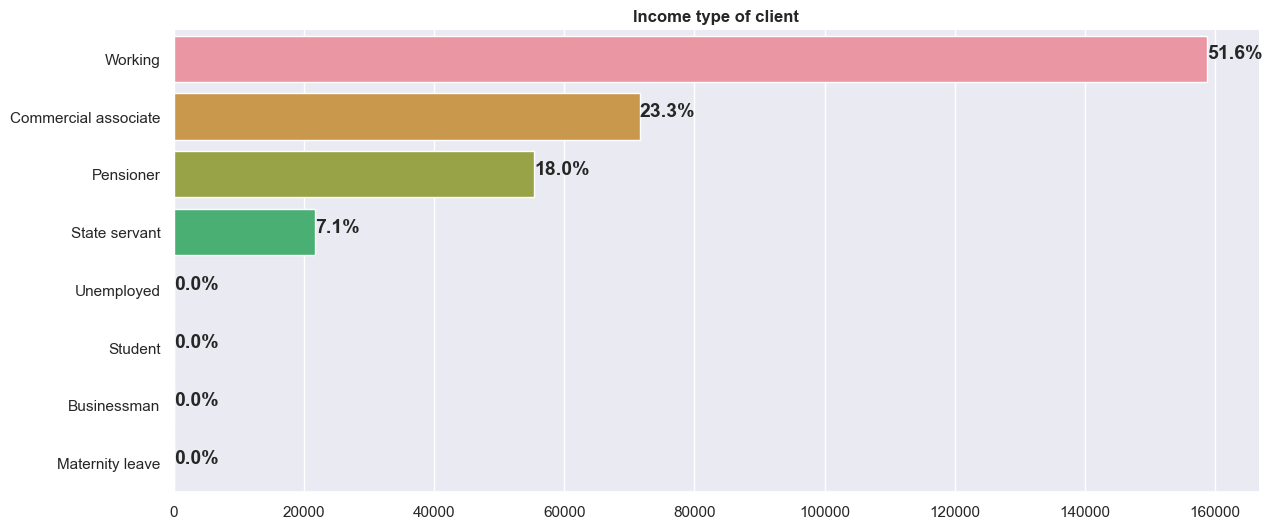

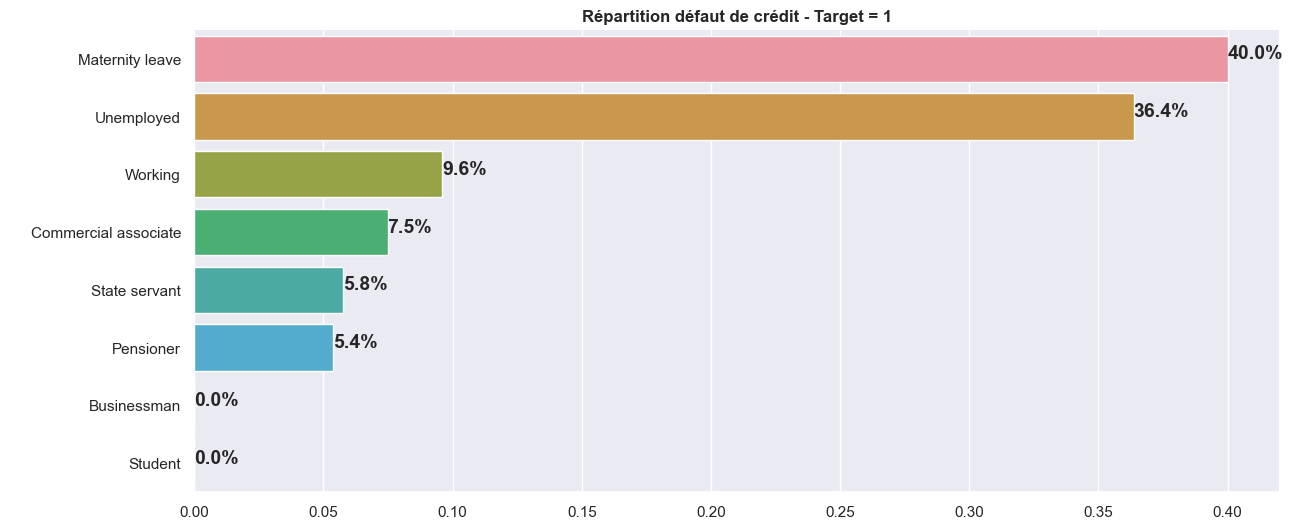

In [90]:
#NAME_INCOME_TYPE
plot_stat(application_train, 'NAME_INCOME_TYPE',"Income type of client")
print("")
print("")
plot_percent_target1(application_train, 'NAME_INCOME_TYPE')

La plupart des demandeurs de prêts sont des revenus du travail, suivis par un associé commercial, un retraité et un fonctionnaire.

Les demandeurs avec le type de revenu Congé de maternité ont un ratio de près de 40% de prêts non remboursés, suivis des chômeurs (37%). Les autres types de revenus sont inférieurs à la moyenne de 10% pour ne pas rembourser les prêts.

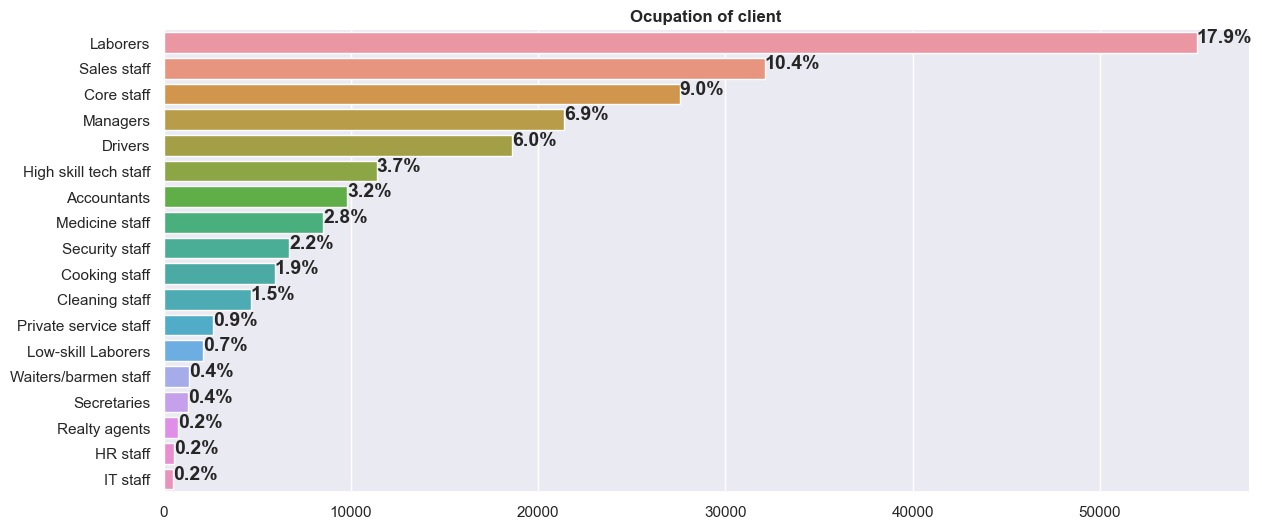

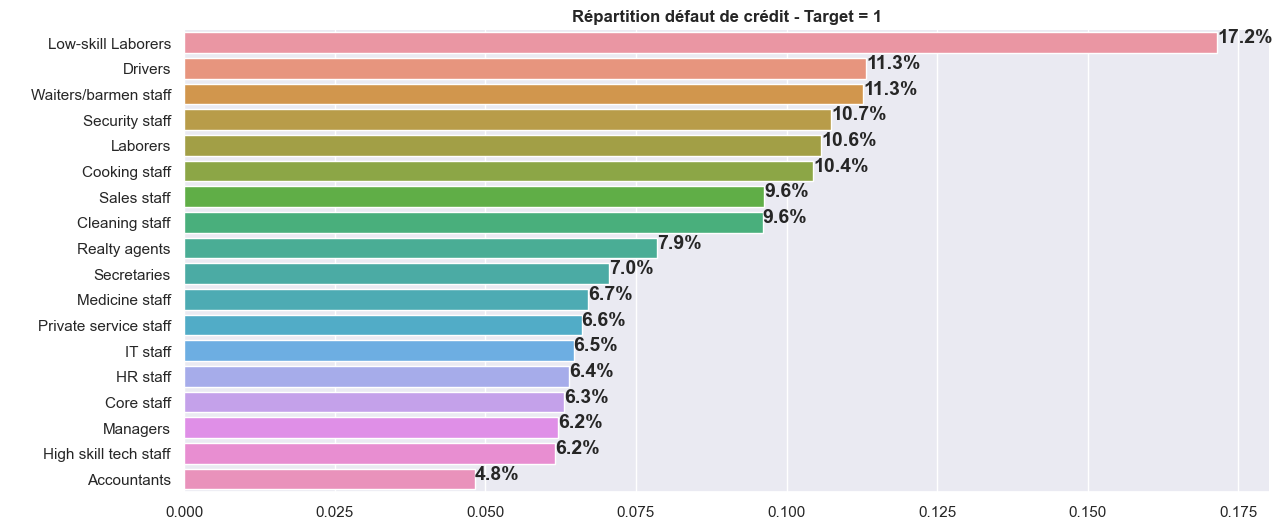

In [91]:
#OCCUPATION_TYPE
plot_stat(application_train, 'OCCUPATION_TYPE',"Ocupation of client")
print(" ")
print(" ")
plot_percent_target1(application_train, 'OCCUPATION_TYPE')


La plupart des prêts sont contractés par des ouvriers, suivis par les vendeurs/commerciaux. Le personnel informatique prend le montant de prêts le plus bas.

La catégorie avec le pourcentage le plus élevé de prêts non remboursés est celle des ouvriers peu qualifiés (plus de 17%), suivis des chauffeurs et des serveurs / barmen, du personnel de sécurité, des ouvriers et du personnel de cuisine.

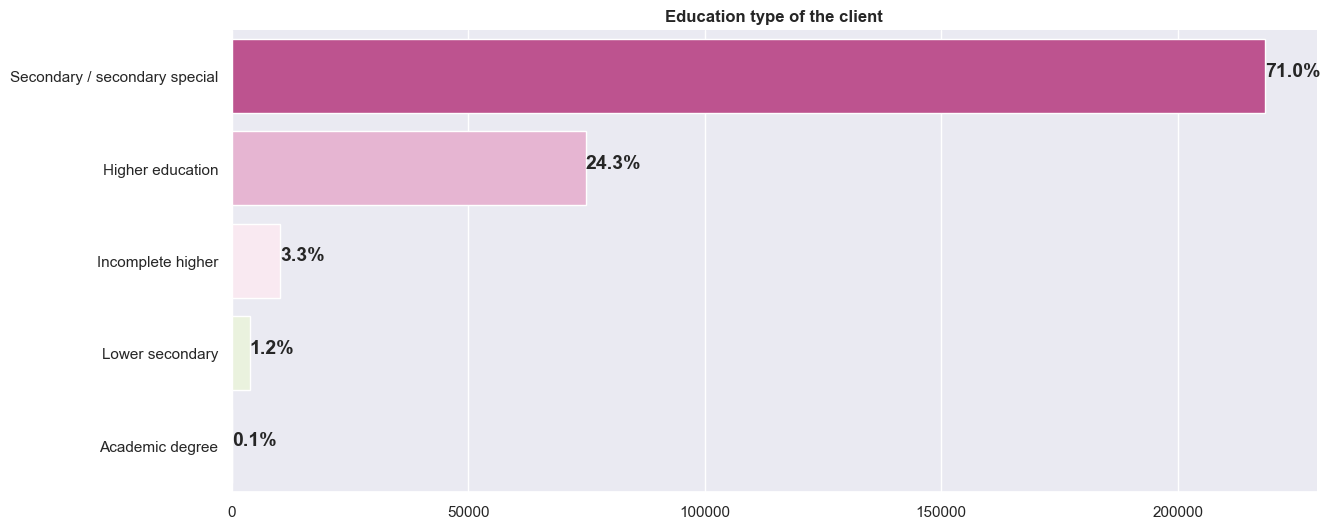

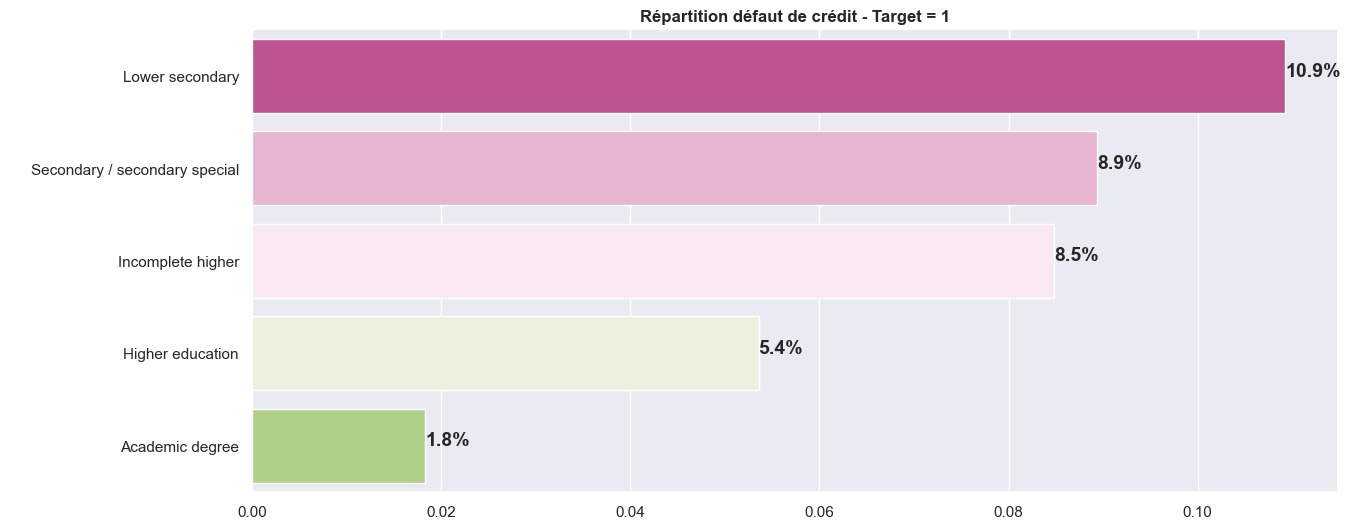

In [92]:
#NAME_EDUCATION_TYPE
plot_stat(application_train, 'NAME_EDUCATION_TYPE',"Education type of the client")
print("")
print("")
plot_percent_target1(application_train, 'NAME_EDUCATION_TYPE')

La majorité des clients ont une éducation dans l'éducation secondaire, suivis des clients avec une éducation supérieure. Un très petit nombre d'emprunteur possède un diplôme universitaire.

La catégorie du premier cycle du secondaire, bien que rare, a le taux le plus élevé de non-remboursement du prêt (11%). Les personnes ayant un diplôme universitaire ont un taux de non-remboursement inférieur à 2%.

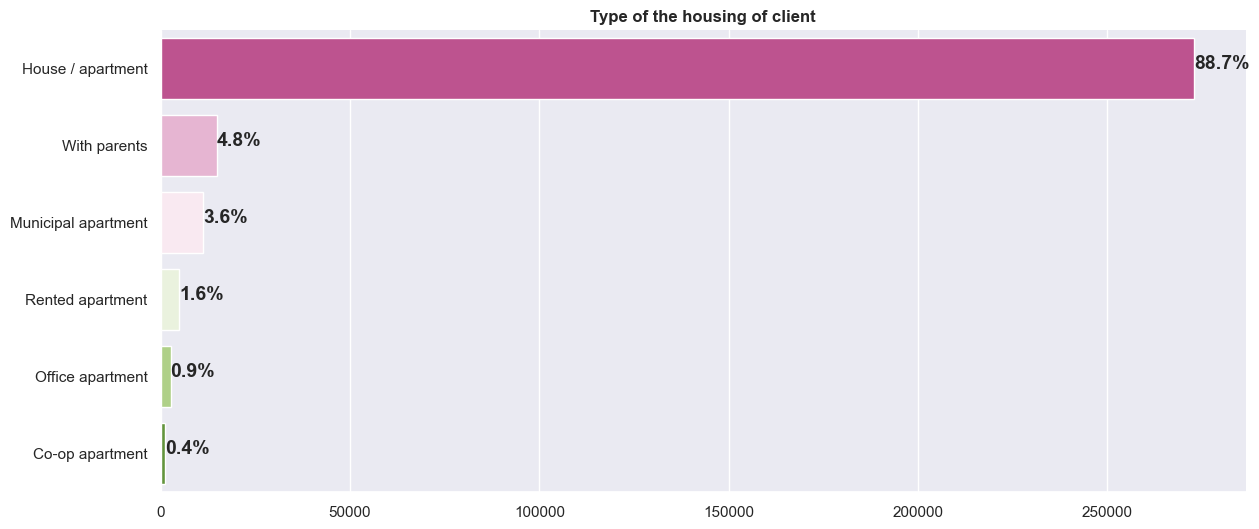

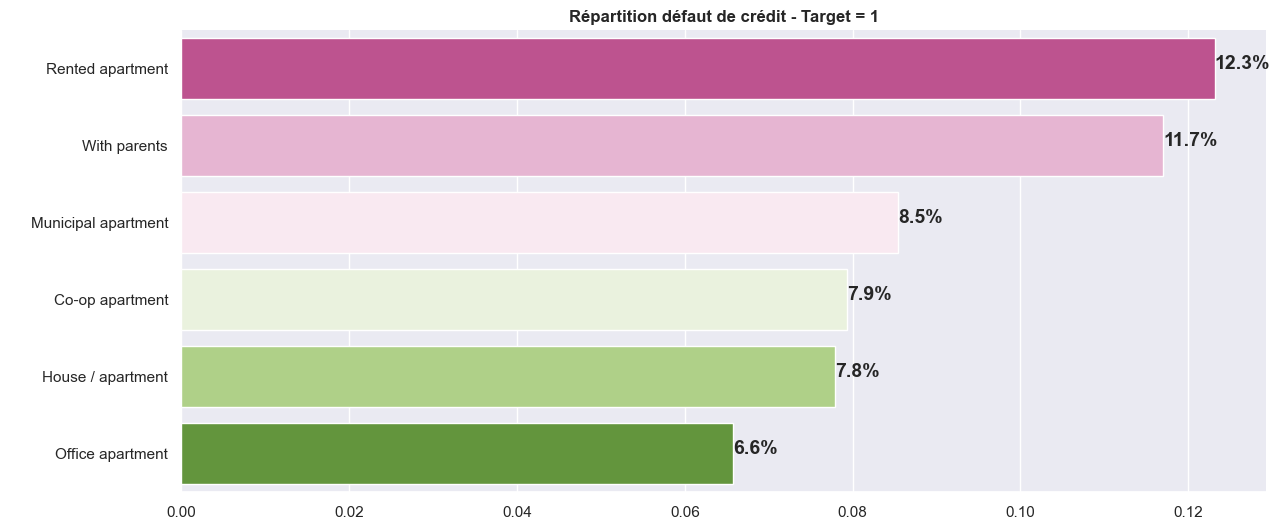

In [93]:
#NAME_HOUSING_TYPE
plot_stat(application_train, 'NAME_HOUSING_TYPE',"Type of the housing of client")
print("")
print("")
plot_percent_target1(application_train, 'NAME_HOUSING_TYPE')

Plus de 250 000 demandeurs de crédits vivent en maison ou appartement. Les catégories suivantes, faible pourcentage, représentent une population moins "indépendante" (vivre chez ses parents, etc…).

Dans ces catégories, les loueurs d'appartements (non propriétaires de leur résidence principale), ainsi que ceux qui vivent chez leurs parents, ont un taux de non-remboursement supérieur à 10%.

In [94]:
#How many days before the application the perso... (def. from HomeCredit_columns_description.csv)
display(application_train['DAYS_EMPLOYED'].describe().T)
display(application_test['DAYS_EMPLOYED'].describe().T)

count    307511.000000
mean       -174.835742
std         387.056895
min       -1000.665753
25%           0.791781
50%           3.323288
75%           7.561644
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

count    48744.000000
mean      -184.891415
std        395.475362
min      -1000.665753
25%          0.810959
50%          3.542466
75%          7.972603
max         47.843836
Name: DAYS_EMPLOYED, dtype: float64

In [95]:
print("%0.0f values with 365243 days employed for training data" % 
      len(application_train[application_train['DAYS_EMPLOYED'] == 365243]))
print("%0.0f Total values from days employed for training data" % application_train.shape[0])
print("***********************")
print("%0.0f values with 365243 days employed for testing data" % 
      len(application_test[application_test['DAYS_EMPLOYED'] == 365243]))
print("%0.0f Total values from days employed for testing data" % application_test.shape[0])

0 values with 365243 days employed for training data
307511 Total values from days employed for training data
***********************
0 values with 365243 days employed for testing data
48744 Total values from days employed for testing data


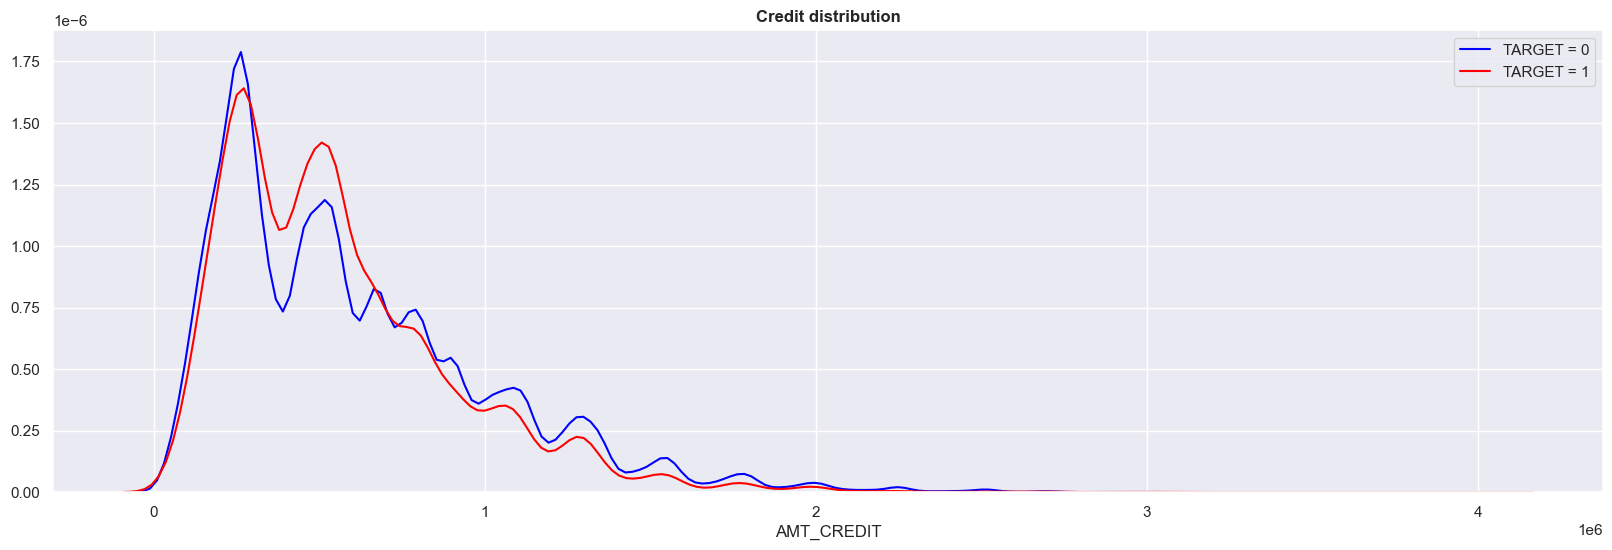

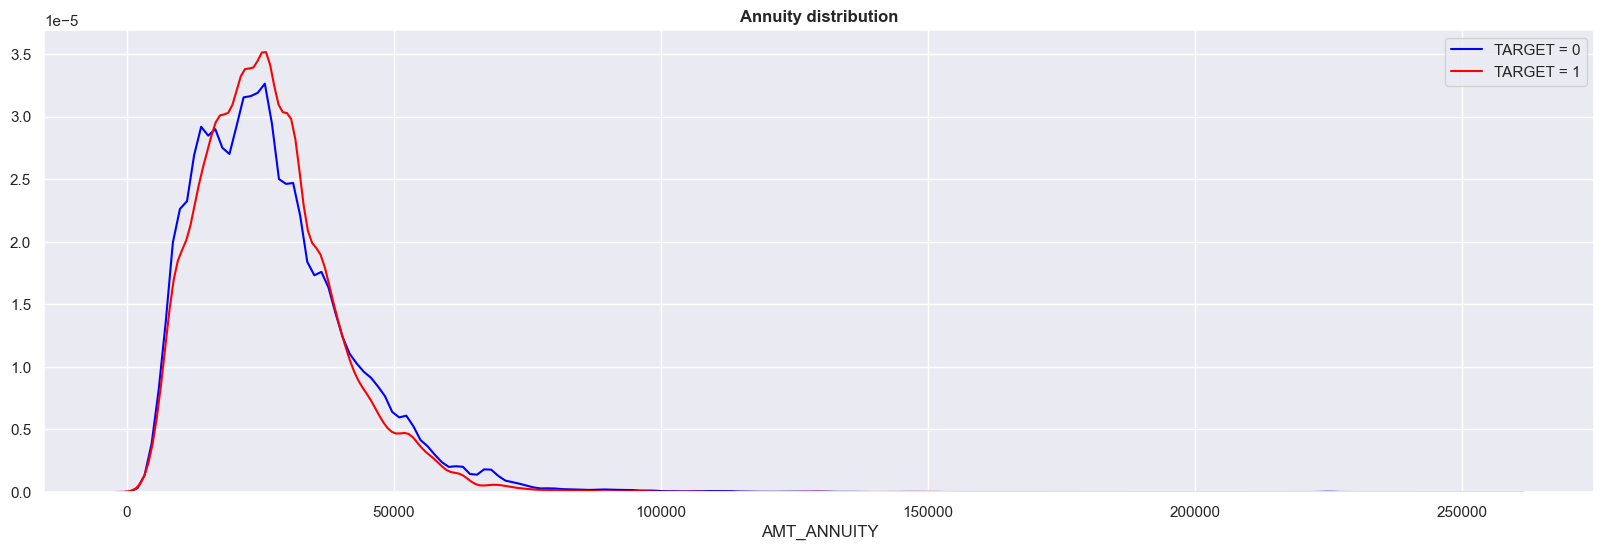

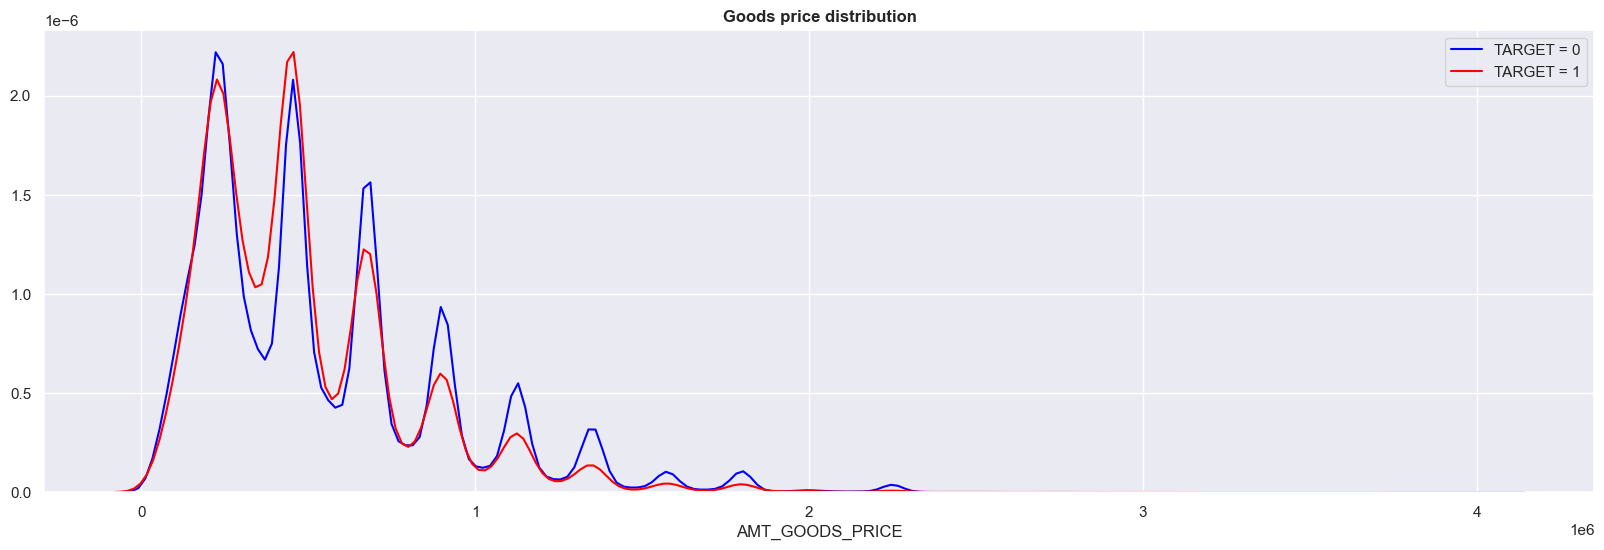

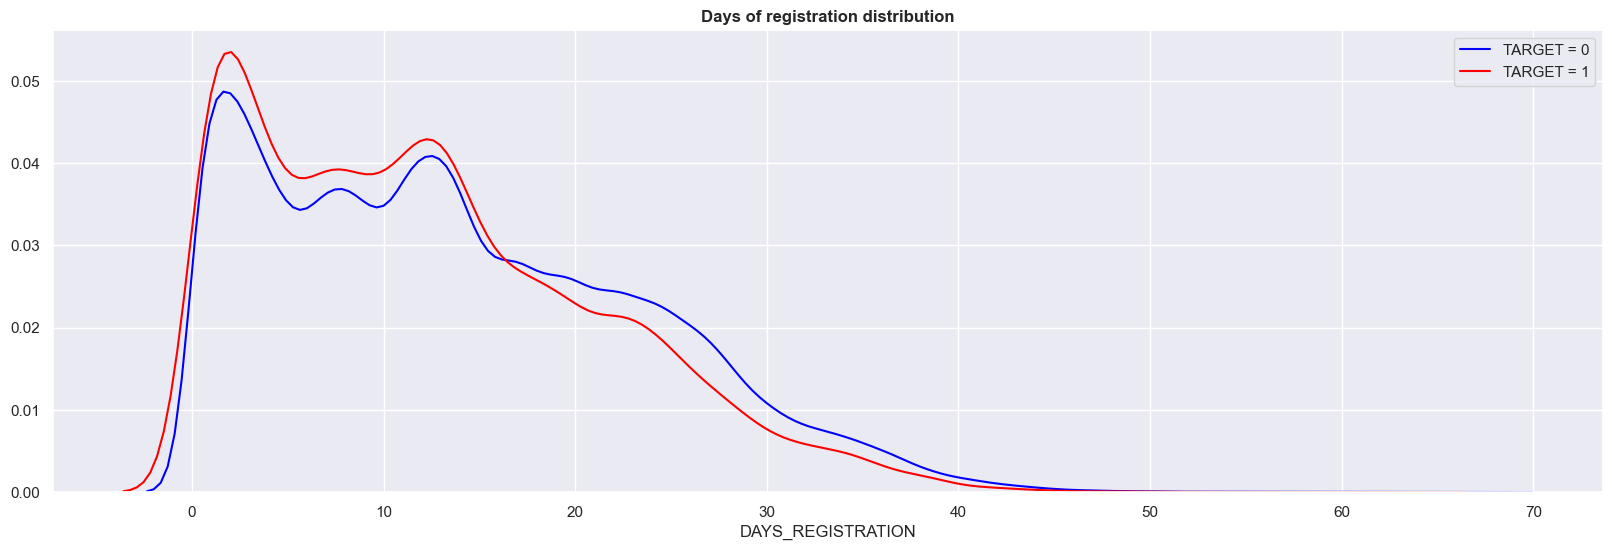

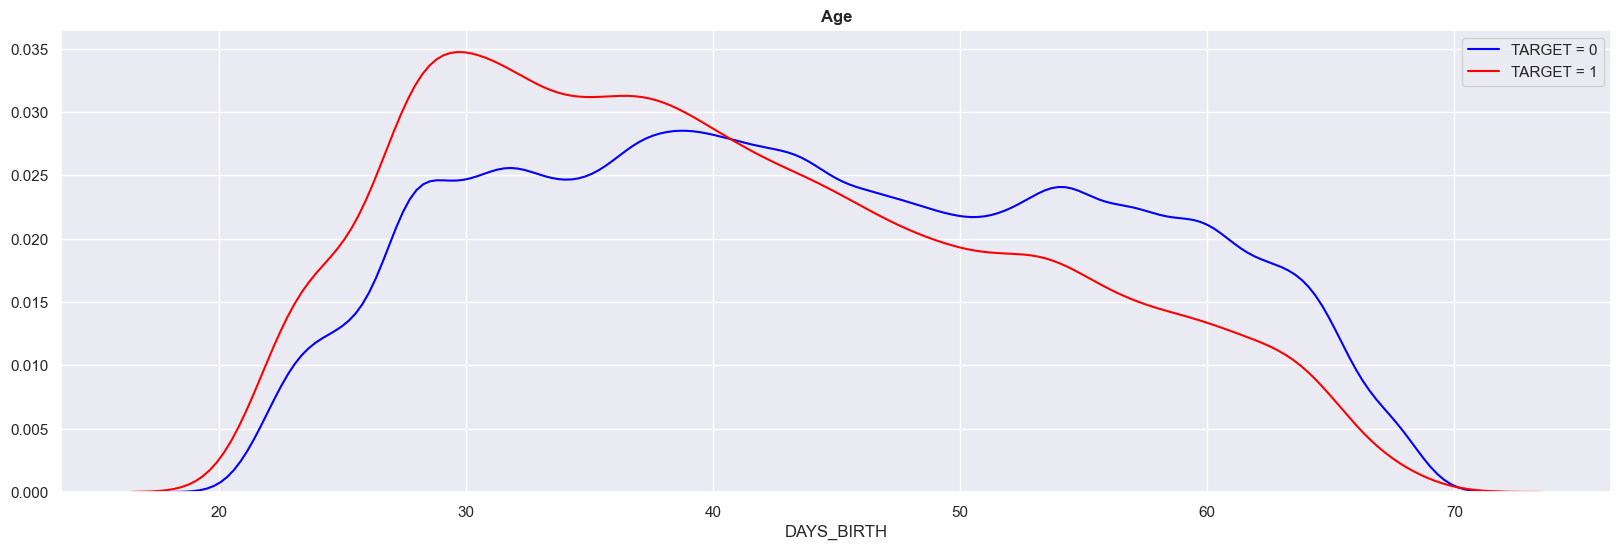

In [96]:
plot_distribution(application_train,'AMT_CREDIT', "Credit distribution")
print("")
print("")
plot_distribution(application_train,'AMT_ANNUITY', "Annuity distribution")
print("")
print("")
plot_distribution(application_train,'AMT_GOODS_PRICE', "Goods price distribution")
print("")
print("")
plot_distribution(application_train,'DAYS_REGISTRATION', "Days of registration distribution")
print("")
print("")
plot_distribution(application_train,'DAYS_BIRTH', "Age")

### EDA previous_application.csv

In [97]:
# Fusion avec la table application train pour récupérer la target
application_prev_train = application_train.merge(previous_application, 
                                                 left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

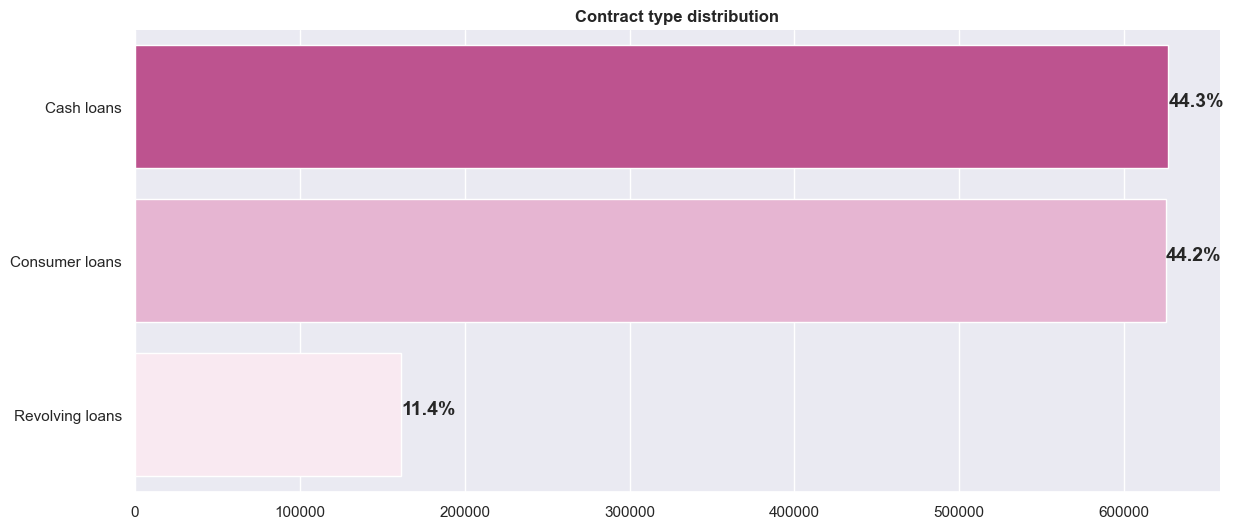

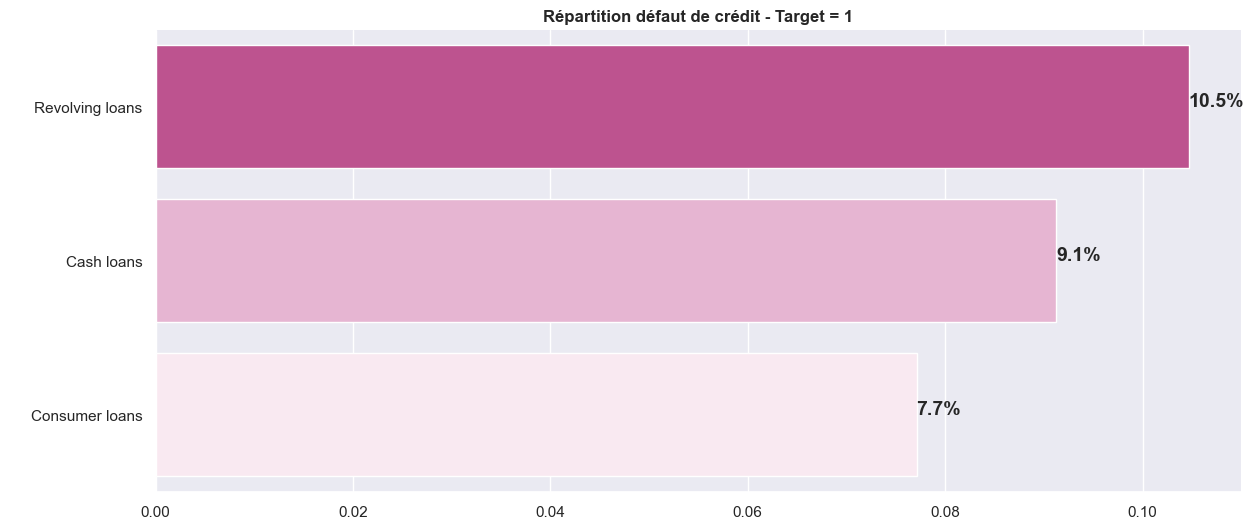

In [98]:
# Par type de prêt
plot_stat(application_prev_train, 'NAME_CONTRACT_TYPE_y',"Contract type distribution")
print("")
print("")
plot_percent_target1(application_prev_train, 'NAME_CONTRACT_TYPE_y')

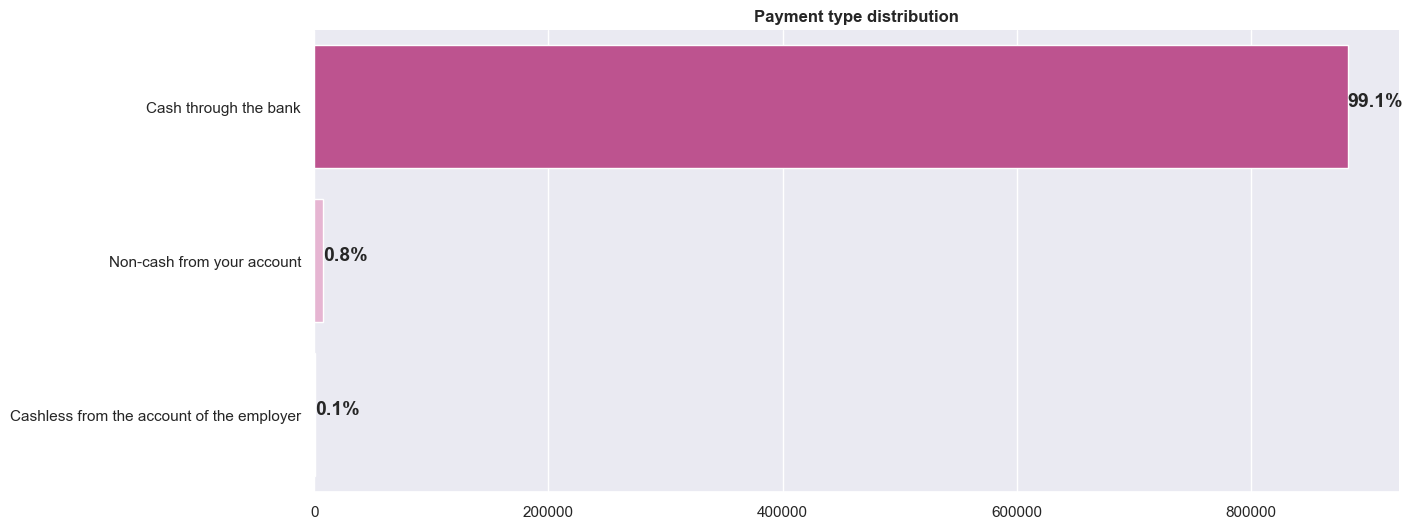

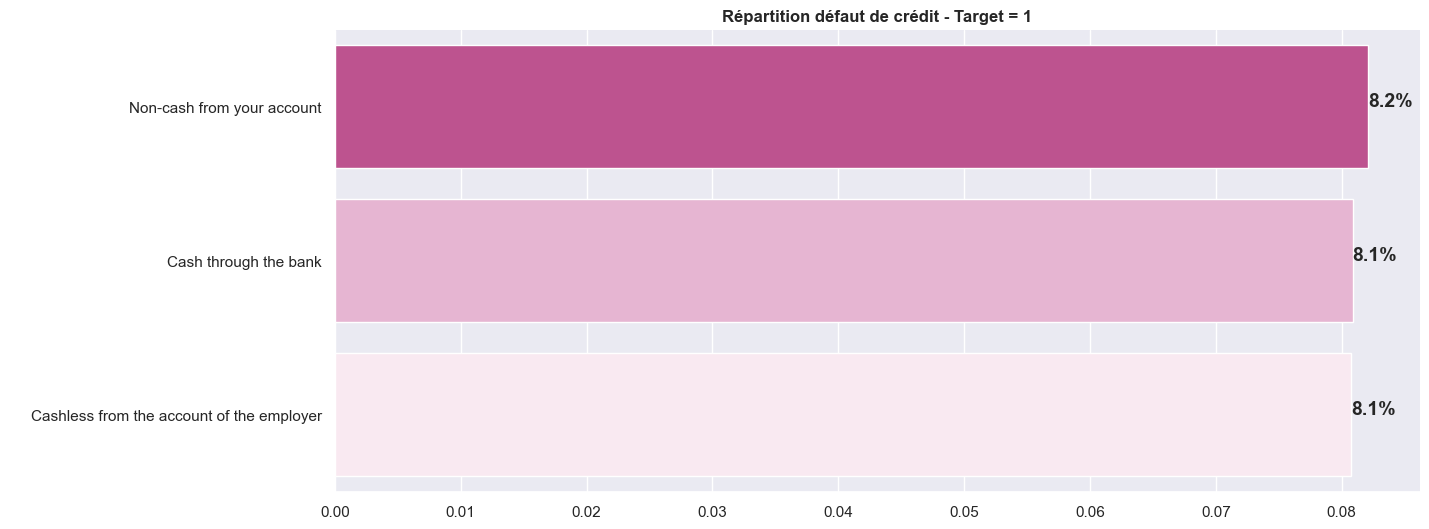

In [99]:
#par financement
plot_stat(application_prev_train, 'NAME_PAYMENT_TYPE',"Payment type distribution")
print("")
print("")
plot_percent_target1(application_prev_train, 'NAME_PAYMENT_TYPE')

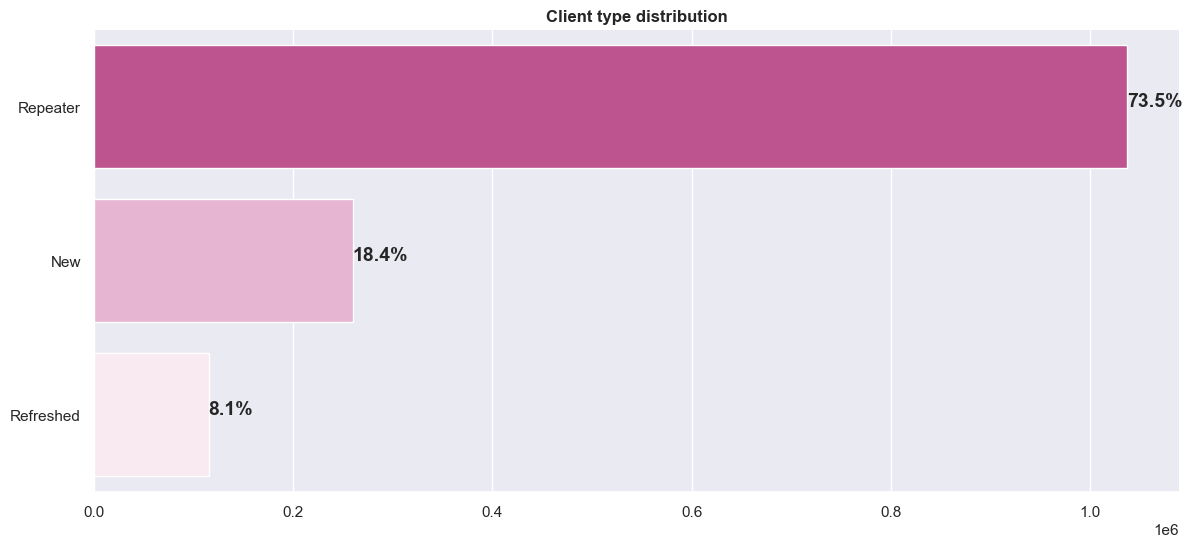

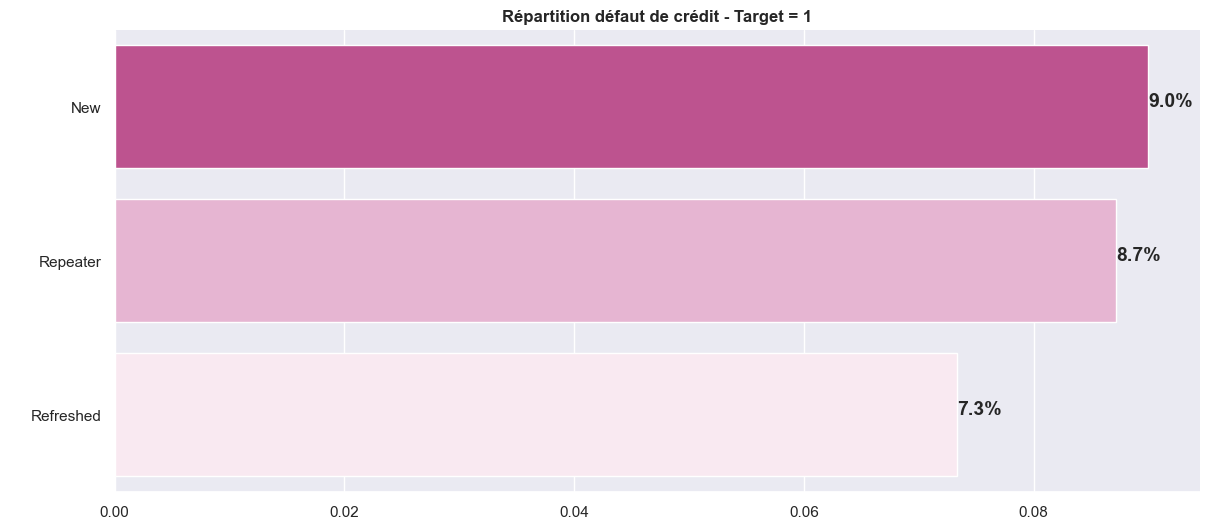

In [100]:
#par type de client
plot_stat(application_prev_train, 'NAME_CLIENT_TYPE',"Client type distribution")
print("")
print("")
plot_percent_target1(application_prev_train, 'NAME_CLIENT_TYPE')

In [101]:
### EDA bureau.csv

In [102]:
application_bureau_train = application_train.merge(bureau, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

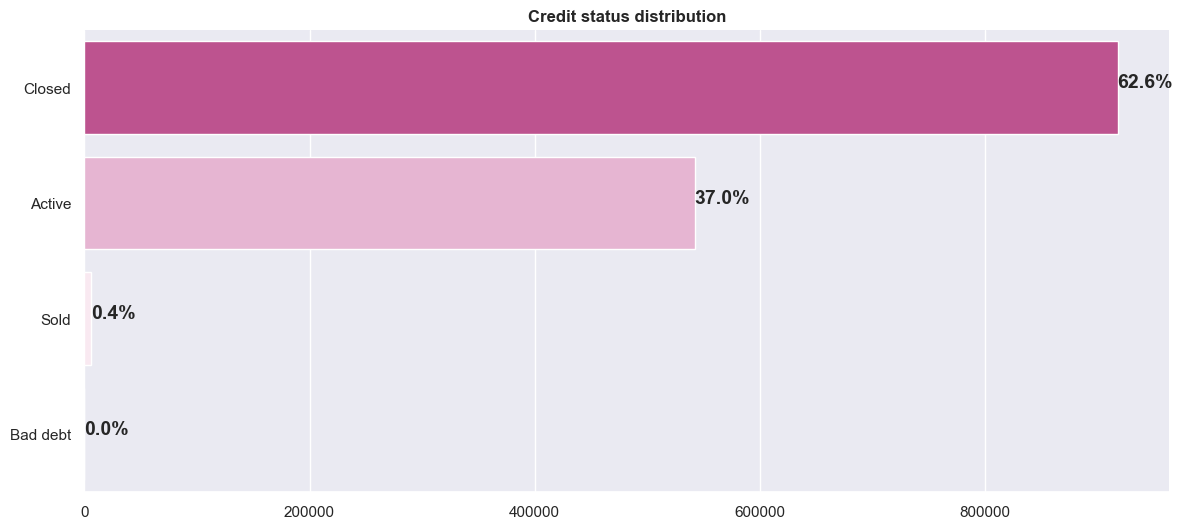

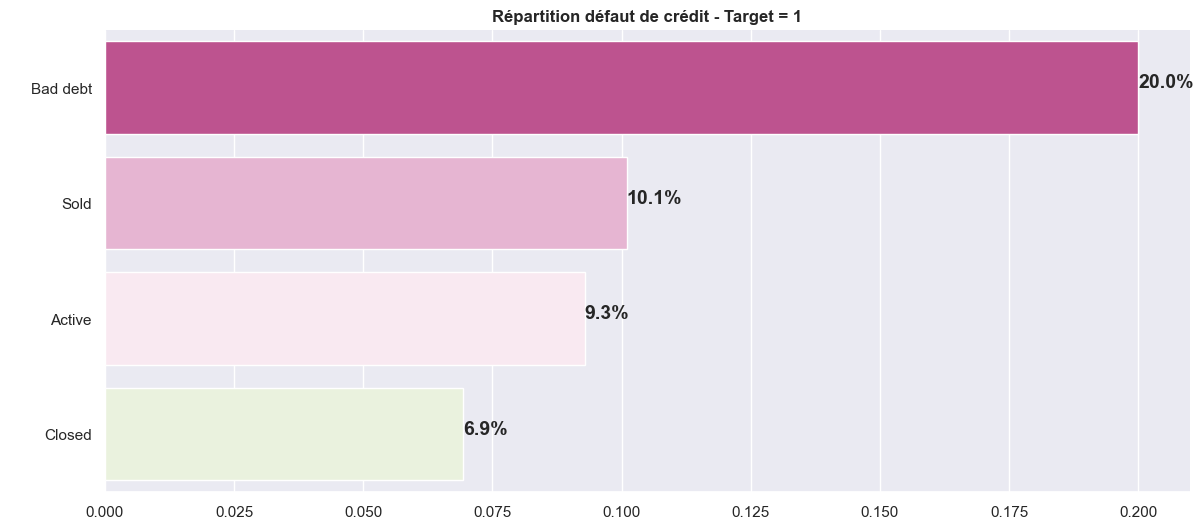

In [103]:
#CREDIT_ACTIVE
plot_stat(application_bureau_train, 'CREDIT_ACTIVE',"Credit status distribution")
print("")
print("")
plot_percent_target1(application_bureau_train, 'CREDIT_ACTIVE')

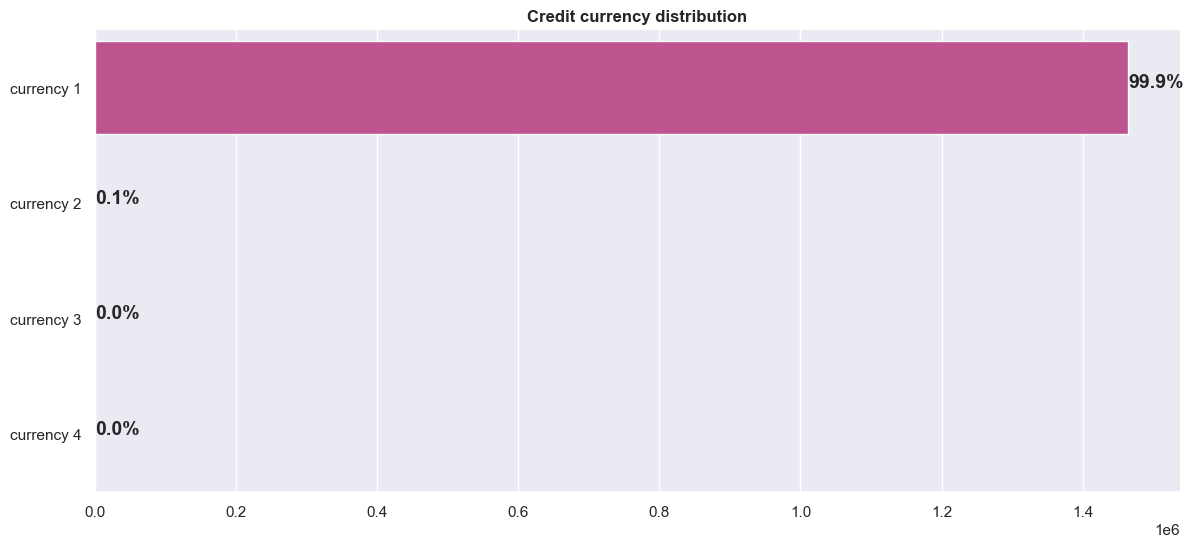

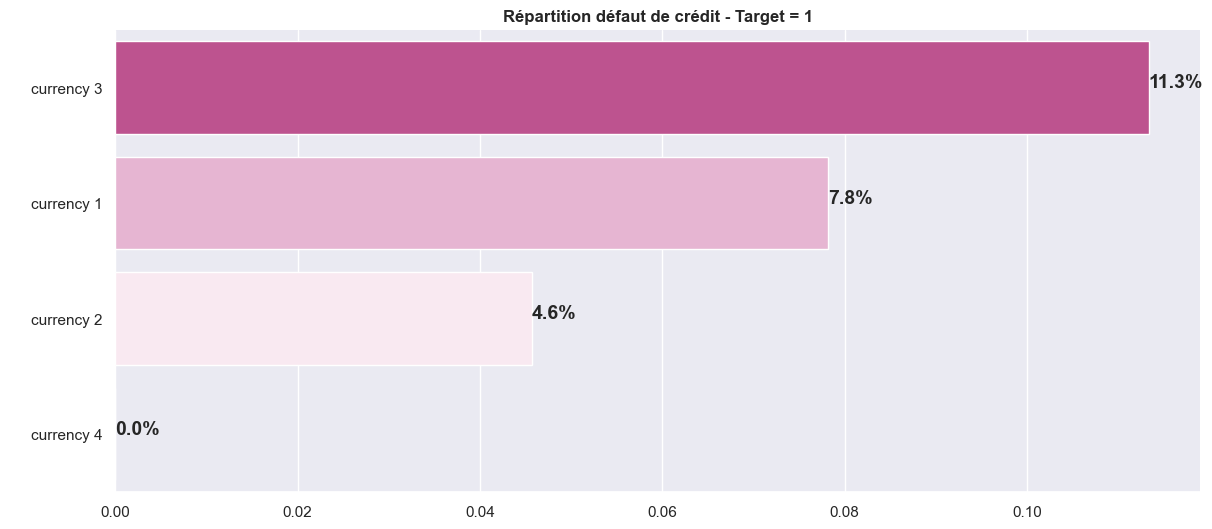

In [104]:
#CREDIT_CURRENCY
plot_stat(application_bureau_train, 'CREDIT_CURRENCY',"Credit currency distribution")
print("")
print("")
plot_percent_target1(application_bureau_train, 'CREDIT_CURRENCY')

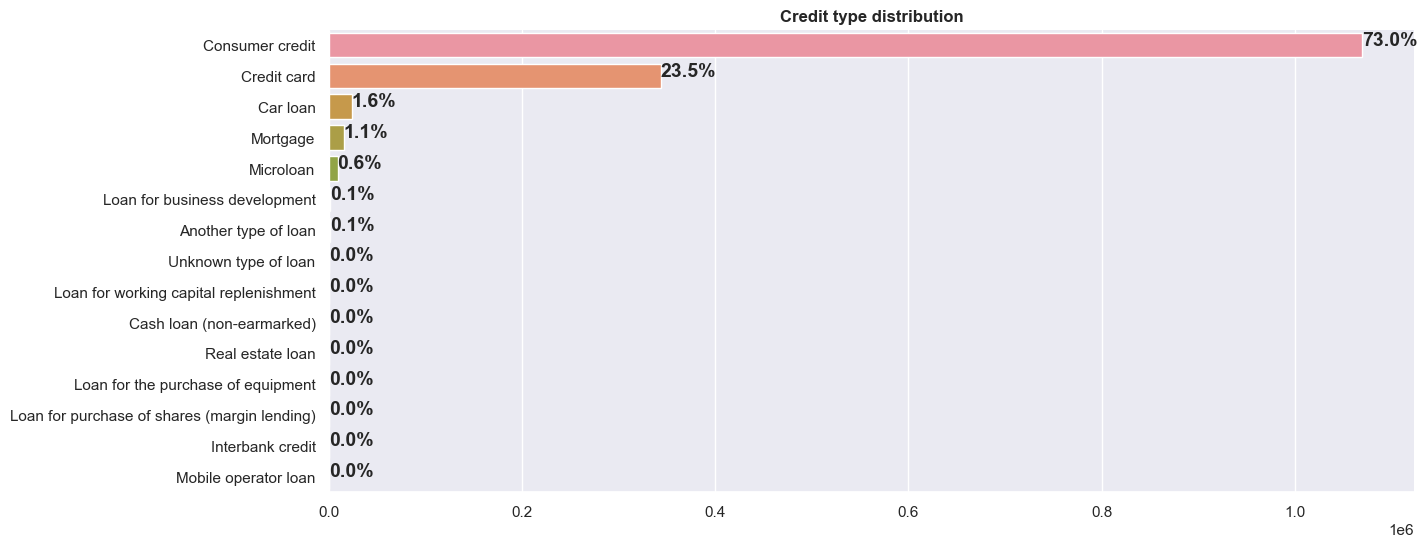

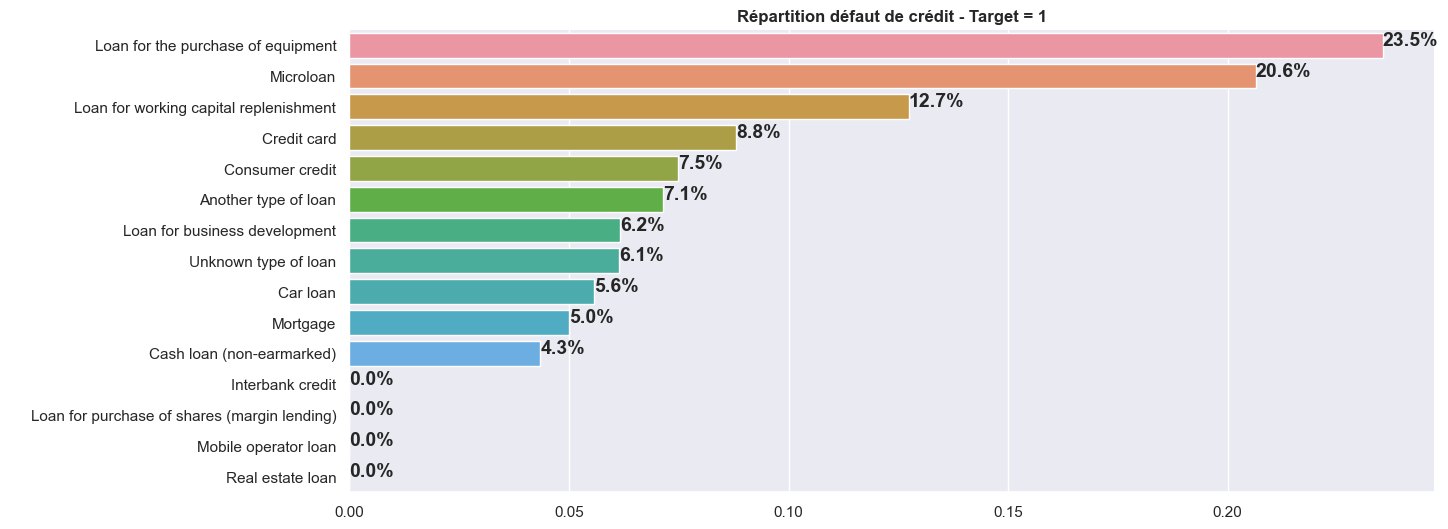

In [105]:
#Type de crédit
plot_stat(application_bureau_train, 'CREDIT_TYPE',"Credit type distribution")
print("")
print("")
plot_percent_target1(application_bureau_train, 'CREDIT_TYPE')

## PARTIE 3 - AGREGATION DES DATA

In [106]:
#Create a simple dataset with the train / test merge app
data = application_train.append(application_test)

Les deux jeux de données ont exactement le même format avec une seule différence, la TARGET dispo dans le train.

In [107]:
print('Train:' + str(application_train.shape))
print('Test:' + str(application_test.shape))
print('>>> Data:' + str(data.shape))

Train:(307511, 122)
Test:(48744, 121)
>>> Data:(356255, 122)


In [108]:
#Vérification TARGET - Données manquantes
data.TARGET.isna().sum()

48744

In [109]:
# Vérification cohérence des identifiants de crédit
sum(data.SK_ID_CURR[data.TARGET.isna()] == application_test.SK_ID_CURR)

48744

### Table Bureau

A partir du fichier bureau.csv, il est possible d'extraire un historique sur les précédents crédits enregistrés par les clients. Il peut donc être intéressant d'enrichir l'échantillon avec ce type de données.

Calcul du nombre total des précédents crédits pris par chaque client. Ce type d'information viendra enrichir l'échantillon de travail…

In [110]:
# Creation du dataset TableClient
previous_loan_counts = bureau.groupby('SK_ID_CURR', as_index=False)\
            .agg({'SK_ID_BUREAU': "count",
                  "CREDIT_DAY_OVERDUE": "mean",
                  "DAYS_CREDIT_ENDDATE": "mean",
                  "AMT_CREDIT_SUM_OVERDUE": "sum",
                  "AMT_CREDIT_SUM": "sum",
                  "AMT_CREDIT_SUM_DEBT": "sum"}).rename(
                                       columns = {'SK_ID_BUREAU': 'PREVIOUS_LOANS_COUNT'})

In [111]:
previous_loan_counts.head()

,SK_ID_CURR,PREVIOUS_LOANS_COUNT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,AMT_CREDIT_SUM_OVERDUE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT
0,100001,7,0.0,-0.225832,0.0,1453365.000,596686.5
1,100002,8,0.0,0.956164,0.0,865055.565,245781.0
2,100003,4,0.0,1.491781,0.0,1017400.500,0.0
3,100004,2,0.0,1.338356,0.0,189037.800,0.0
4,100005,3,0.0,-1.203653,0.0,657126.000,568408.5


In [112]:
#Fusion de cette nouvelle données avec la data globale
data = data.merge(previous_loan_counts, on='SK_ID_CURR', how='left')
data.shape

(356255, 128)

### Table bureau_balance 

In [113]:
# Creation du datasat pour récupérer le dernier mois et son statut
bureau_bal_max = bureau_balance.groupby('SK_ID_BUREAU', as_index=False)\
            .agg({'MONTHS_BALANCE': "max"}).rename(
                                       columns = {'MONTHS_BALANCE': 'MAX_MONTH_BALANCE'})
bureau_bal_max = bureau_balance.groupby('SK_ID_BUREAU', as_index=False)\
            .agg({'MONTHS_BALANCE': "max"})

In [114]:
#Fusion avec la table Bureau_balance
bureau_bal_max = bureau_bal_max.merge(bureau_balance, on=['SK_ID_BUREAU','MONTHS_BALANCE'], how='left')
bureau_bal_max.shape

(817395, 3)

In [115]:
#Fusion avec la table bureau pour récupérer le SK_ID_CURR
bureau_full = bureau.merge(bureau_bal_max, on='SK_ID_BUREAU', how='left')
bureau_full.drop('SK_ID_BUREAU', axis=1, inplace=True)
display(bureau_full.head())
display(bureau_full.shape)

,SK_ID_CURR,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,MONTHS_BALANCE,STATUS
0,215354,Closed,currency 1,1.361644,-0.0,0.419178,0.419178,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,0.358904,NaN,NaN,NaN
1,215354,Active,currency 1,0.569863,-0.0,-2.945205,0.000000,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,0.054795,NaN,NaN,NaN
2,215354,Active,currency 1,0.556164,-0.0,-1.446575,0.000000,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,0.043836,NaN,NaN,NaN
3,215354,Active,currency 1,0.556164,-0.0,NaN,0.000000,NaN,0,90000.0,NaN,NaN,0.0,Credit card,0.043836,NaN,NaN,NaN
4,215354,Active,currency 1,1.723288,-0.0,-3.279452,0.000000,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,0.057534,NaN,NaN,NaN


(1716428, 18)

In [116]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
bureau_full['STATUS']= label_encoder.fit_transform(bureau_full['STATUS']) 

In [117]:
# Creation du dataset TableClient
bureau_mean = bureau_full.groupby('SK_ID_CURR', as_index=False)\
            .agg({'MONTHS_BALANCE': "mean",
                  'STATUS': "mean"})

In [118]:
#Fusion avec la table globale
data = data.merge(bureau_mean, on='SK_ID_CURR', how='left')
data.shape

(356255, 130)

### previous_application

In [119]:
# vérification cohérence SK_ID_CURR entre data globale et previous_application
len(previous_application.SK_ID_CURR.isin(data.SK_ID_CURR)) == len(previous_application)

True

In [120]:
#nombre de demandes précédentes des clients au crédit immobilier
previous_application_counts = previous_application.groupby('SK_ID_CURR', 
                                                           as_index=False)['SK_ID_PREV'].count().rename(
                                                           columns = {'SK_ID_PREV': 'PREVIOUS_APPLICATION_COUNT'})
previous_application_counts.head()

,SK_ID_CURR,PREVIOUS_APPLICATION_COUNT
0,100001,1
1,100002,1
2,100003,3
3,100004,1
4,100005,2


In [121]:
#Fusion de cette nouvelle donnée avec la date globale
data = data.merge(previous_application_counts, on='SK_ID_CURR', how='left')
data.shape

(356255, 131)

### credit_card_balance

In [122]:
credit_card_balance.drop('SK_ID_CURR', axis=1, inplace=True)

In [123]:
# Solde mensuel moyen des cartes de crédit
credit_card_balance_mean = credit_card_balance.groupby('SK_ID_PREV', as_index=False).mean().add_prefix('CARD_MEAN_')
credit_card_balance_mean.rename(columns = {'CARD_MEAN_SK_ID_PREV' : 'SK_ID_PREV'}, inplace=True)
credit_card_balance_mean.shape

(104307, 15)

In [124]:
#Merge with previous_application
previous_application = previous_application.merge(credit_card_balance_mean, on='SK_ID_PREV', how='left')
previous_application.shape

(1670214, 47)

### installments_payments

In [125]:
installments_payments.drop('SK_ID_CURR', axis=1, inplace=True)

In [126]:
install_pay_mean = installments_payments.groupby('SK_ID_PREV', as_index=False).mean().add_prefix('INSTALL_MEAN_')
install_pay_mean.rename(columns = {'INSTALL_MEAN_SK_ID_PREV' : 'SK_ID_PREV'}, inplace=True)
install_pay_mean.shape

(997752, 6)

In [127]:
#Merge with previous_application
previous_application = previous_application.merge(install_pay_mean, on='SK_ID_PREV', how='left')
previous_application.shape

(1670214, 52)

### POS_CASH_balance

In [128]:
POS_CASH_balance.drop('SK_ID_CURR', axis=1, inplace=True)

In [129]:
POS_mean = installments_payments.groupby('SK_ID_PREV', as_index=False).mean().add_prefix('POS_MEAN_')
POS_mean.rename(columns = {'POS_MEAN_SK_ID_PREV' : 'SK_ID_PREV'}, inplace=True)
POS_mean.shape

(997752, 6)

In [130]:
#Merge with previous_application
previous_application = previous_application.merge(POS_mean, on='SK_ID_PREV', how='left')
previous_application.shape

(1670214, 57)

In [131]:
#Retour sur previous_application pour assembles les lignes d'observation selon 'SK_ID_CURR'.
prev_appl_mean = previous_application.groupby('SK_ID_CURR', as_index=False).mean().add_prefix('PREV_APPL_MEAN_')
prev_appl_mean.rename(columns = {'PREV_APPL_MEAN_SK_ID_CURR' : 'SK_ID_CURR'}, inplace=True)
prev_appl_mean = prev_appl_mean.drop('PREV_APPL_MEAN_SK_ID_PREV', axis=1)

In [132]:
#Last merge with our data sample
data = data.merge(prev_appl_mean, on='SK_ID_CURR', how='left')
display(data.head())
display(data.shape)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,PREVIOUS_LOANS_COUNT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,AMT_CREDIT_SUM_OVERDUE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,MONTHS_BALANCE,STATUS,PREVIOUS_APPLICATION_COUNT,PREV_APPL_MEAN_AMT_ANNUITY,PREV_APPL_MEAN_AMT_CREDIT,PREV_APPL_MEAN_AMT_DOWN_PAYMENT,PREV_APPL_MEAN_HOUR_APPR_PROCESS_START,PREV_APPL_MEAN_NFLAG_LAST_APPL_IN_DAY,PREV_APPL_MEAN_RATE_DOWN_PAYMENT,PREV_APPL_MEAN_DAYS_DECISION,PREV_APPL_MEAN_SELLERPLACE_AREA,PREV_APPL_MEAN_CNT_PAYMENT,PREV_APPL_MEAN_DAYS_FIRST_DRAWING,PREV_APPL_MEAN_DAYS_FIRST_DUE,PREV_APPL_MEAN_DAYS_LAST_DUE_1ST_VERSION,PREV_APPL_MEAN_DAYS_LAST_DUE,PREV_APPL_MEAN_DAYS_TERMINATION,PREV_APPL_MEAN_NFLAG_INSURED_ON_APPROVAL,PREV_APPL_MEAN_CARD_MEAN_MONTHS_BALANCE,PREV_APPL_MEAN_CARD_MEAN_AMT_CREDIT_LIMIT_ACTUAL,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_ATM_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_OTHER_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_POS_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_INST_MIN_REGULARITY,PREV_APPL_MEAN_CARD_MEAN_AMT_PAYMENT_TOTAL_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_TOTAL_RECEIVABLE,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_ATM_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_OTHER_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_POS_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_INSTALMENT_MATURE_CUM,PREV_APPL_MEAN_CARD_MEAN_SK_DPD,PREV_APPL_MEAN_CARD_MEAN_SK_DPD_DEF,PREV_APPL_MEAN_INSTALL_MEAN_NUM_INSTALMENT_VERSION,PREV_APPL_MEAN_INSTALL_MEAN_NUM_INSTALMENT_NUMBER,PREV_APPL_MEAN_INSTALL_MEAN_DAYS_INSTALMENT,PREV_APPL_MEAN_INSTALL_MEAN_AMT_INSTALMENT,PREV_APPL_MEAN_INSTALL_MEAN_AMT_PAYMENT,PREV_APPL_MEAN_POS_MEAN_NUM_INSTALMENT_VERSION,PREV_APPL_MEAN_POS_MEAN_NUM_INSTALMENT_NUMBER,PREV_APPL_MEAN_POS_MEAN_DAYS_INSTALMENT,PREV_APPL_MEAN_POS_MEAN_AMT_INSTALMENT,PREV_APPL_MEAN_POS_MEAN_AMT_PAYMENT
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597

(356255, 170)

In [133]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,PREVIOUS_LOANS_COUNT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,AMT_CREDIT_SUM_OVERDUE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,MONTHS_BALANCE,STATUS,PREVIOUS_APPLICATION_COUNT,PREV_APPL_MEAN_AMT_ANNUITY,PREV_APPL_MEAN_AMT_CREDIT,PREV_APPL_MEAN_AMT_DOWN_PAYMENT,PREV_APPL_MEAN_HOUR_APPR_PROCESS_START,PREV_APPL_MEAN_NFLAG_LAST_APPL_IN_DAY,PREV_APPL_MEAN_RATE_DOWN_PAYMENT,PREV_APPL_MEAN_DAYS_DECISION,PREV_APPL_MEAN_SELLERPLACE_AREA,PREV_APPL_MEAN_CNT_PAYMENT,PREV_APPL_MEAN_DAYS_FIRST_DRAWING,PREV_APPL_MEAN_DAYS_FIRST_DUE,PREV_APPL_MEAN_DAYS_LAST_DUE_1ST_VERSION,PREV_APPL_MEAN_DAYS_LAST_DUE,PREV_APPL_MEAN_DAYS_TERMINATION,PREV_APPL_MEAN_NFLAG_INSURED_ON_APPROVAL,PREV_APPL_MEAN_CARD_MEAN_MONTHS_BALANCE,PREV_APPL_MEAN_CARD_MEAN_AMT_CREDIT_LIMIT_ACTUAL,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_ATM_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_OTHER_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_POS_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_INST_MIN_REGULARITY,PREV_APPL_MEAN_CARD_MEAN_AMT_PAYMENT_TOTAL_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_TOTAL_RECEIVABLE,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_ATM_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_OTHER_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_POS_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_INSTALMENT_MATURE_CUM,PREV_APPL_MEAN_CARD_MEAN_SK_DPD,PREV_APPL_MEAN_CARD_MEAN_SK_DPD_DEF,PREV_APPL_MEAN_INSTALL_MEAN_NUM_INSTALMENT_VERSION,PREV_APPL_MEAN_INSTALL_MEAN_NUM_INSTALMENT_NUMBER,PREV_APPL_MEAN_INSTALL_MEAN_DAYS_INSTALMENT,PREV_APPL_MEAN_INSTALL_MEAN_AMT_INSTALMENT,PREV_APPL_MEAN_INSTALL_MEAN_AMT_PAYMENT,PREV_APPL_MEAN_POS_MEAN_NUM_INSTALMENT_VERSION,PREV_APPL_MEAN_POS_MEAN_NUM_INSTALMENT_NUMBER,PREV_APPL_MEAN_POS_MEAN_DAYS_INSTALMENT,PREV_APPL_MEAN_POS_MEAN_AMT_INSTALMENT,PREV_APPL_MEAN_POS_MEAN_AMT_PAYMENT
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597

## PARTIE 3 - VALEURS MANQUANTES

### Valeurs manquantes

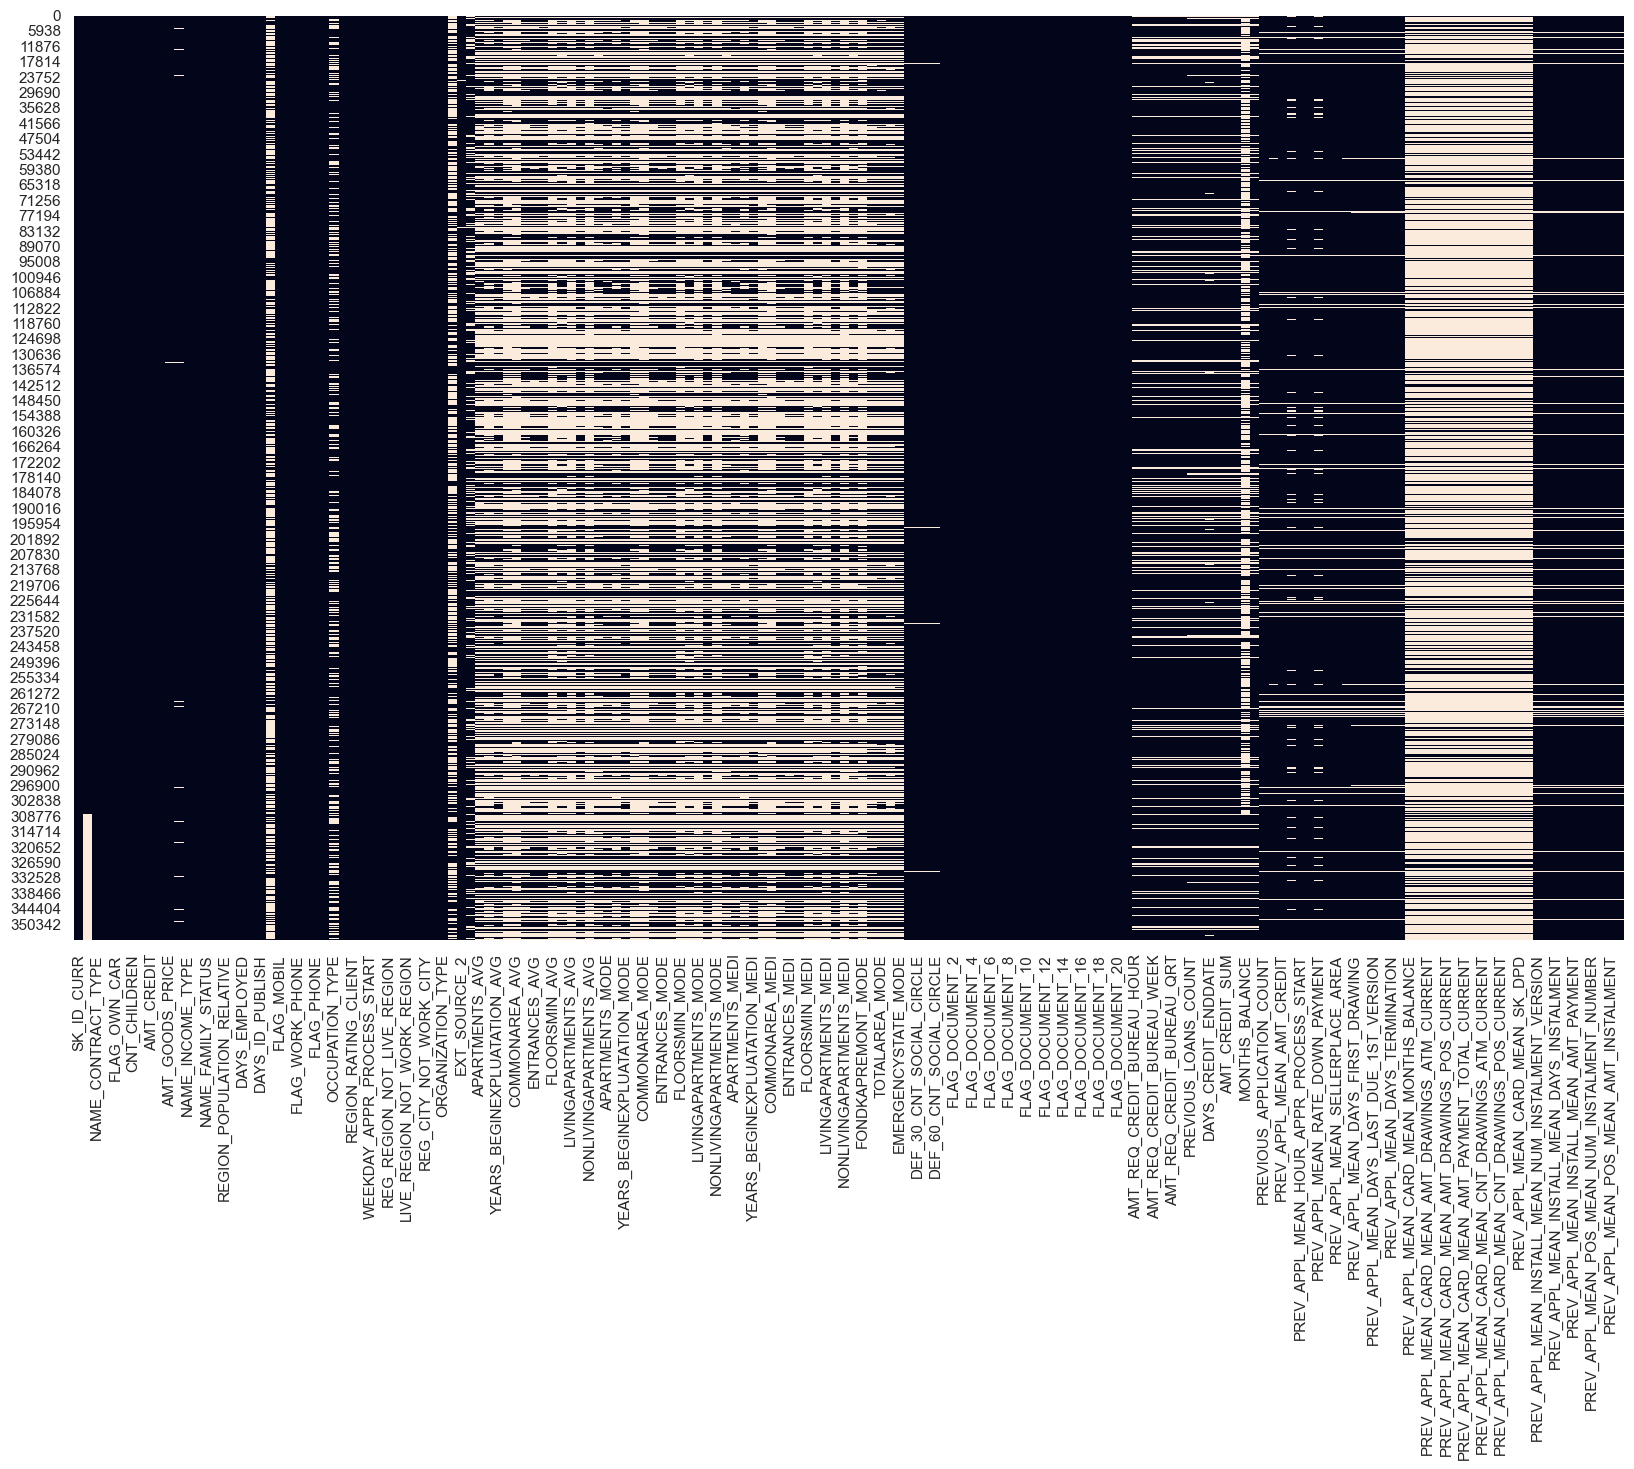

In [134]:
plt.figure(figsize=(20,12))
sns.heatmap(data.isna(), cbar= False)
plt.show()

### Imputation des valeurs manquantes

L'une des approches les plus simples consiste à remplacer les NaN par la Médiane (ou Moyenne) pour les variables correspondantes.

In [135]:
from sklearn.impute import SimpleImputer


In [136]:
print('Missing values in data: ', sum(data.isnull().sum()))

Missing values in data:  15398182


In [137]:
variables_catégorielles = data.select_dtypes(include='object')
imputer_cat = SimpleImputer(strategy='most_frequent')
data[variables_catégorielles.columns] = imputer_cat.fit_transform(data[variables_catégorielles.columns])

In [138]:
variables_numériques= data.select_dtypes(include=['int', 'float'])
imputer = SimpleImputer(strategy='median')
data[variables_numériques.columns] = imputer.fit_transform(data[variables_numériques.columns])

In [139]:
#Check Imputation step
sum(data.isnull().sum())

0

## PARTIE 4 - FEATURES ENGINEERING

### Description globale de la data globale

In [140]:
#Before…
data.shape

(356255, 170)

In [141]:
#Nombre de colonne de chaque type
data.dtypes.value_counts()

float64    154
object      16
dtype: int64

In [142]:
#Number of unique classes in each object column
data.select_dtypes('object').nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

## Création de 4 nouvelles

- CREDIT_INCOME_PERCENT: Pourcentage du montant du crédit par rapport au revenu d'un client
- ANNUITY_INCOME_PERCENT: Pourcentage de la rente de prêt par rapport au revenu d'un client
- CREDIT_TERM: Durée du paiement en mois
- DAYS_EMPLOYED_PERCENT: Pourcentage des jours employés par rapport à l'âge du client

In [143]:
data['CREDIT_INCOME_PERCENT'] = data['AMT_CREDIT'] / data['AMT_INCOME_TOTAL']
data['ANNUITY_INCOME_PERCENT'] = data['AMT_ANNUITY'] / data['AMT_INCOME_TOTAL']
data['CREDIT_TERM'] = data['AMT_CREDIT'] / data['AMT_ANNUITY']
data['DAYS_EMPLOYED_PERCENT'] = data['DAYS_EMPLOYED'] / data['DAYS_BIRTH']

In [144]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,PREVIOUS_LOANS_COUNT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,AMT_CREDIT_SUM_OVERDUE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,MONTHS_BALANCE,STATUS,PREVIOUS_APPLICATION_COUNT,PREV_APPL_MEAN_AMT_ANNUITY,PREV_APPL_MEAN_AMT_CREDIT,PREV_APPL_MEAN_AMT_DOWN_PAYMENT,PREV_APPL_MEAN_HOUR_APPR_PROCESS_START,PREV_APPL_MEAN_NFLAG_LAST_APPL_IN_DAY,PREV_APPL_MEAN_RATE_DOWN_PAYMENT,PREV_APPL_MEAN_DAYS_DECISION,PREV_APPL_MEAN_SELLERPLACE_AREA,PREV_APPL_MEAN_CNT_PAYMENT,PREV_APPL_MEAN_DAYS_FIRST_DRAWING,PREV_APPL_MEAN_DAYS_FIRST_DUE,PREV_APPL_MEAN_DAYS_LAST_DUE_1ST_VERSION,PREV_APPL_MEAN_DAYS_LAST_DUE,PREV_APPL_MEAN_DAYS_TERMINATION,PREV_APPL_MEAN_NFLAG_INSURED_ON_APPROVAL,PREV_APPL_MEAN_CARD_MEAN_MONTHS_BALANCE,PREV_APPL_MEAN_CARD_MEAN_AMT_CREDIT_LIMIT_ACTUAL,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_ATM_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_OTHER_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_POS_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_INST_MIN_REGULARITY,PREV_APPL_MEAN_CARD_MEAN_AMT_PAYMENT_TOTAL_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_TOTAL_RECEIVABLE,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_ATM_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_OTHER_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_POS_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_INSTALMENT_MATURE_CUM,PREV_APPL_MEAN_CARD_MEAN_SK_DPD,PREV_APPL_MEAN_CARD_MEAN_SK_DPD_DEF,PREV_APPL_MEAN_INSTALL_MEAN_NUM_INSTALMENT_VERSION,PREV_APPL_MEAN_INSTALL_MEAN_NUM_INSTALMENT_NUMBER,PREV_APPL_MEAN_INSTALL_MEAN_DAYS_INSTALMENT,PREV_APPL_MEAN_INSTALL_MEAN_AMT_INSTALMENT,PREV_APPL_MEAN_INSTALL_MEAN_AMT_PAYMENT,PREV_APPL_MEAN_POS_MEAN_NUM_INSTALMENT_VERSION,PREV_APPL_MEAN_POS_MEAN_NUM_INSTALMENT_NUMBER,PREV_APPL_MEAN_POS_MEAN_DAYS_INSTALMENT,PREV_APPL_MEAN_POS_MEAN_AMT_INSTALMENT,PREV_APPL_MEAN_POS_MEAN_AMT_PAYMENT,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CR

## Preprocessing des données

### Encoding categorical features

In [145]:
from sklearn.preprocessing import LabelEncoder

In [146]:
# Create a label encoder object
le = LabelEncoder()
count = 0

# Iterate through the columns
for col in data:
    # If 2 or fewer unique categories
    if data.loc[:,col].dtype == 'object' and len(list(data.loc[:,col].unique())) <= 2:
        le.fit(data.loc[:,col])
        data.loc[:,col] = le.transform(data.loc[:,col])
        count += 1
            
print('%d columns were label encoded.' % count)

4 columns were label encoded.


In [147]:
print('Training Features shape with categorical columns: ', data.shape)

Training Features shape with categorical columns:  (356255, 174)


In [148]:
data = pd.get_dummies(data)

In [149]:
print('Data Features shape with categorical columns: ', data.shape)

Data Features shape with categorical columns:  (356255, 294)


### Standardisation des données

In [150]:
from sklearn.preprocessing import MinMaxScaler

In [151]:
data_stand=data.drop(['SK_ID_CURR','TARGET'],axis=1)
data_prov=data[['SK_ID_CURR','TARGET']]

In [152]:
#Fit scaler to our training data
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(data_stand)
scaled = scaler.transform(data_stand)

In [153]:
#In order to keep our column names we include scaled_values to our train/test dataframes like this
data_scaled = pd.DataFrame(scaled, index=data_stand.index, columns=data_stand.columns)

In [154]:
data_VF = pd.concat([ data_prov,data_scaled],axis=1)

In [155]:
data_VF.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,PREVIOUS_LOANS_COUNT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,AMT_CREDIT_SUM_OVERDUE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,MONTHS_BALANCE,STATUS,PREVIOUS_APPLICATION_COUNT,PREV_APPL_MEAN_AMT_ANNUITY,PREV_APPL_MEAN_AMT_CREDIT,PREV_APPL_MEAN_AMT_DOWN_PAYMENT,PREV_APPL_MEAN_HOUR_APPR_PROCESS_START,PREV_APPL_MEAN_NFLAG_LAST_APPL_IN_DAY,PREV_APPL_MEAN_RATE_DOWN_PAYMENT,PREV_APPL_MEAN_DAYS_DECISION,PREV_APPL_MEAN_SELLERPLACE_AREA,PREV_APPL_MEAN_CNT_PAYMENT,PREV_APPL_MEAN_DAYS_FIRST_DRAWING,PREV_APPL_MEAN_DAYS_FIRST_DUE,PREV_APPL_MEAN_DAYS_LAST_DUE_1ST_VERSION,PREV_APPL_MEAN_DAYS_LAST_DUE,PREV_APPL_MEAN_DAYS_TERMINATION,PREV_APPL_MEAN_NFLAG_INSURED_ON_APPROVAL,PREV_APPL_MEAN_CARD_MEAN_MONTHS_BALANCE,PREV_APPL_MEAN_CARD_MEAN_AMT_CREDIT_LIMIT_ACTUAL,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_ATM_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_OTHER_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_POS_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_INST_MIN_REGULARITY,PREV_APPL_MEAN_CARD_MEAN_AMT_PAYMENT_TOTAL_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_TOTAL_RECEIVABLE,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_ATM_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_OTHER_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_POS_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_INSTALMENT_MATURE_CUM,PREV_APPL_MEAN_CARD_MEAN_SK_DPD,PREV_APPL_MEAN_CARD_MEAN_SK_DPD_DEF,PREV_APPL_MEAN_INSTALL_MEAN_NUM_INSTALMENT_VERSION,PREV_APPL_MEAN_INSTALL_MEAN_NUM_INSTALMENT_NUMBER,PREV_APPL_MEAN_INSTALL_MEAN_DAYS_INSTALMENT,PREV_APPL_MEAN_INSTALL_MEAN_AMT_INSTALMENT,PREV_APPL_MEAN_INSTALL_MEAN_AMT_PAYMENT,PREV_APPL_MEAN_POS_MEAN_NUM_INSTALMENT_VERSION,PREV_APPL_MEAN_POS_MEAN_NUM_INSTALMENT_NUMBER,PREV_APPL_MEAN_POS_MEAN_DAYS_INSTALMENT,PREV_APPL_MEAN_POS_MEAN_AMT_INSTALMENT,PREV_APPL_MEAN_POS_MEAN_AMT_PAYMENT,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_S

### Split train / test data

Il est nécessaire de commencer par la mise en place des données d'entrainement / test. On peut procéder en rappel avec les jeux de données application_train/test.

In [156]:

data_train = data_VF[data_VF['SK_ID_CURR'].isin(application_train.SK_ID_CURR)]
data_test = data_VF[data_VF['SK_ID_CURR'].isin(application_test.SK_ID_CURR)]

data_test= data_test.drop('TARGET', axis=1)

In [157]:
#data_train.set_index('SK_ID_CURR', inplace=True)
#data_test.set_index('SK_ID_CURR', inplace=True)

In [158]:
print('Training Features shape with categorical columns: ', data_train.shape)
print('Testing Features shape with categorical columns: ', data_test.shape)

Training Features shape with categorical columns:  (307511, 294)
Testing Features shape with categorical columns:  (48744, 293)


In [159]:
TARGET = data_train['TARGET']
data_train.drop('TARGET', axis=1, inplace=True)

In [160]:
TARGET=pd.DataFrame(TARGET, columns=["TARGET"])

In [161]:
TARGET.head()

,TARGET
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0


In [162]:
data_train.drop('SK_ID_CURR', axis=1, inplace=True)

In [163]:
X_train, X_test, y_train, y_test = train_test_split(data_train, TARGET['TARGET'], test_size=0.3, random_state=42)

In [164]:
X_train.head()

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,PREVIOUS_LOANS_COUNT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,AMT_CREDIT_SUM_OVERDUE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,MONTHS_BALANCE,STATUS,PREVIOUS_APPLICATION_COUNT,PREV_APPL_MEAN_AMT_ANNUITY,PREV_APPL_MEAN_AMT_CREDIT,PREV_APPL_MEAN_AMT_DOWN_PAYMENT,PREV_APPL_MEAN_HOUR_APPR_PROCESS_START,PREV_APPL_MEAN_NFLAG_LAST_APPL_IN_DAY,PREV_APPL_MEAN_RATE_DOWN_PAYMENT,PREV_APPL_MEAN_DAYS_DECISION,PREV_APPL_MEAN_SELLERPLACE_AREA,PREV_APPL_MEAN_CNT_PAYMENT,PREV_APPL_MEAN_DAYS_FIRST_DRAWING,PREV_APPL_MEAN_DAYS_FIRST_DUE,PREV_APPL_MEAN_DAYS_LAST_DUE_1ST_VERSION,PREV_APPL_MEAN_DAYS_LAST_DUE,PREV_APPL_MEAN_DAYS_TERMINATION,PREV_APPL_MEAN_NFLAG_INSURED_ON_APPROVAL,PREV_APPL_MEAN_CARD_MEAN_MONTHS_BALANCE,PREV_APPL_MEAN_CARD_MEAN_AMT_CREDIT_LIMIT_ACTUAL,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_ATM_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_OTHER_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_DRAWINGS_POS_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_INST_MIN_REGULARITY,PREV_APPL_MEAN_CARD_MEAN_AMT_PAYMENT_TOTAL_CURRENT,PREV_APPL_MEAN_CARD_MEAN_AMT_TOTAL_RECEIVABLE,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_ATM_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_OTHER_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_POS_CURRENT,PREV_APPL_MEAN_CARD_MEAN_CNT_INSTALMENT_MATURE_CUM,PREV_APPL_MEAN_CARD_MEAN_SK_DPD,PREV_APPL_MEAN_CARD_MEAN_SK_DPD_DEF,PREV_APPL_MEAN_INSTALL_MEAN_NUM_INSTALMENT_VERSION,PREV_APPL_MEAN_INSTALL_MEAN_NUM_INSTALMENT_NUMBER,PREV_APPL_MEAN_INSTALL_MEAN_DAYS_INSTALMENT,PREV_APPL_MEAN_INSTALL_MEAN_AMT_INSTALMENT,PREV_APPL_MEAN_INSTALL_MEAN_AMT_PAYMENT,PREV_APPL_MEAN_POS_MEAN_NUM_INSTALMENT_VERSION,PREV_APPL_MEAN_POS_MEAN_NUM_INSTALMENT_NUMBER,PREV_APPL_MEAN_POS_MEAN_DAYS_INSTALMENT,PREV_APPL_MEAN_POS_MEAN_AMT_INSTALMENT,PREV_APPL_MEAN_POS_MEAN_AMT_PAYMENT,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partn

In [165]:
X_train.shape

(215257, 292)

In [166]:
X_test.shape

(92254, 292)

In [167]:

print('Training Features shape with categorical columns: ', y_train.shape)
print('Testing Features shape with categorical columns: ', y_test.shape)

Training Features shape with categorical columns:  (215257,)
Testing Features shape with categorical columns:  (92254,)


In [168]:
y_train.head()

127044    0.0
281143    1.0
199799    0.0
306749    0.0
301347    0.0
Name: TARGET, dtype: float64

### Feature Selection - Recursive Feature Elimination

In [169]:
%%time
start = time.time()
rfecv = RFECV(estimator=LGBMClassifier(objective='binary'), 
              step=5, 
              cv=StratifiedKFold(5), 
              scoring='roc_auc', 
              verbose=2,
              n_jobs=-1)
rfecv.fit(X_train, y_train)

print('Time Elapsed: {}'.format(time.time()-start))

Fitting estimator with 292 features.
[LightGBM] [Info] Number of positive: 17412, number of negative: 197845
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034272 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23654
[LightGBM] [Info] Number of data points in the train set: 215257, number of used features: 281
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080889 -> initscore=-2.430324
[LightGBM] [Info] Start training from score -2.430324
Fitting estimator with 287 features.
[LightGBM] [Info] Number of positive: 17412, number of negative: 197845
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041463 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23644
[LightGBM] [Info] Number of dat

Fitting estimator with 222 features.
[LightGBM] [Info] Number of positive: 17412, number of negative: 197845
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 22359
[LightGBM] [Info] Number of data points in the train set: 215257, number of used features: 221
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080889 -> initscore=-2.430324
[LightGBM] [Info] Start training from score -2.430324
Fitting estimator with 217 features.
[LightGBM] [Info] Number of positive: 17412, number of negative: 197845
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034809 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 22349
[LightGBM] [Info] Number of dat

Fitting estimator with 152 features.
[LightGBM] [Info] Number of positive: 17412, number of negative: 197845
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026116 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 21318
[LightGBM] [Info] Number of data points in the train set: 215257, number of used features: 152
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080889 -> initscore=-2.430324
[LightGBM] [Info] Start training from score -2.430324
Fitting estimator with 147 features.
[LightGBM] [Info] Number of positive: 17412, number of negative: 197845
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020972 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 20860
[LightGBM] [Info] Number of dat

In [170]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 112


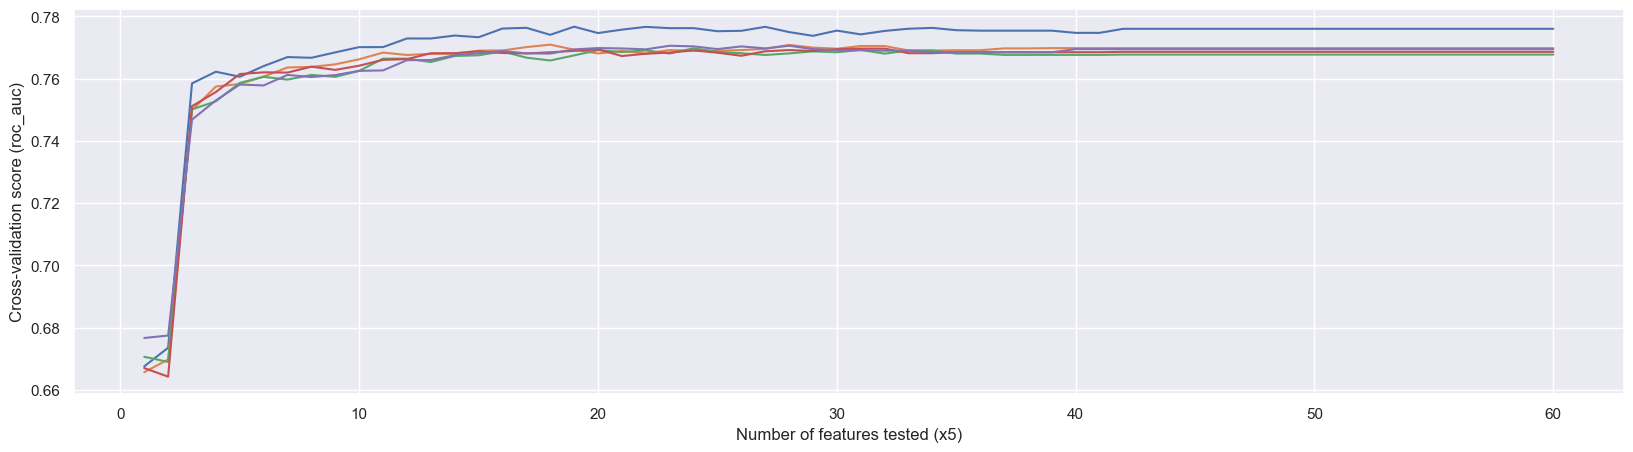

In [171]:
#Plot number of features vs CV scores
step=5
plt.figure(figsize=(20, 5))
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.xlabel('Number of features tested (x%d)' % step)
plt.ylabel('Cross-validation score (roc_auc)')
show()

In [172]:
X_train_rfecv = X_train.loc[:, X_train.columns[rfecv.get_support()]]
X_test_rfecv = X_test.loc[:, X_test.columns[rfecv.get_support()]]

In [173]:
# sauvegarde des datas
X_train_rfecv.to_csv('data_work/X_train.csv', sep ='\t')
X_test_rfecv.to_csv('data_work/X_test.csv', sep ='\t')
y_train.to_csv('data_work/y_train.csv', sep ='\t')
y_test.to_csv('data_work/y_test.csv', sep ='\t')

In [174]:
TARGET.to_csv('TARGET.csv', sep ='\t')

In [175]:
application_train_sample = pd.read_csv('data_source/application_train.csv',nrows=5000)
application_train_sample.to_csv('PROJET7_API/application_train_sample.csv', sep ='\t')

In [176]:
X_test_sample = pd.read_csv('data_work/X_test.csv',nrows=5000, sep ='\t')
X_test_sample.to_csv('PROJET7_API/X_test_sample.csv', sep ='\t')

In [177]:
data_train_t = X_train_rfecv.append(X_test_rfecv)

In [178]:
data_train_t.to_csv('data_work/data_train_t.csv', sep ='\t')

In [179]:
data_target = y_train.append(y_test)

In [180]:
data_target.to_csv('data_work/data_target.csv', sep ='\t')

In [181]:
data_test.drop('SK_ID_CURR', axis=1, inplace=True)
data_test_t=data_test.loc[:, data_test.columns[rfecv.get_support()]]

In [182]:
data_test_t.to_csv('data_work/data_test_t.csv', sep ='\t')